In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
def my_probability(burst,bins,duration):
    prob=(1/(2*bins))/((burst-((burst-1)/(2*bins))))/duration
    return prob

# 1 bin

In [399]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts1(full_time,size,probability,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob=probability
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob:
                    burst[j,i:200+i]=np.nan
                    L[j,i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_fraction=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_fraction.append(fraction_val)
        fraction_val=0
    fraction=[]
    for i in range(len(burst_fraction)):
        fraction.append(burst_fraction[i]/cluster_size)
        
    return burst_total,burst_fraction,fraction

## 50 stars

In [400]:
cluster_size50_1=50
steps=t*cadence
burst50_1=np.ones((cluster_size50_1,steps))
L50_1=np.zeros((cluster_size50_1,steps))
prob50_1=my_probability(100,1,100)/cadence

In [401]:
#1 bin
burst_total50_1=[]
burst_fraction50_1=[]
fraction50_1=[]

for i in range(run):
    burst50_1=np.ones((cluster_size50_1,steps))
    L50_1=np.zeros((cluster_size50_1,steps))
    values50_1=bursts1(t,50,prob50_1,L50_1,burst50_1)
    burst_total50_1.append(values50_1[0])
    burst_fraction50_1.append(values50_1[1])
    fraction50_1.append(values50_1[2])

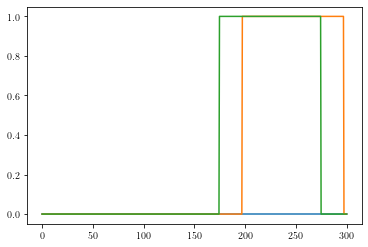

In [402]:
time=np.linspace(0,t,steps)
plt.plot(time,burst_fraction50_1[0])
plt.plot(time,burst_fraction50_1[1])
plt.plot(time,burst_fraction50_1[2])

In [403]:
#calculate the mean of each time step
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

In [404]:
cadence_frac_bursts50_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts50_1.append(fraction50_1[i][j])

In [405]:
mean_frac50_1=np.mean(cadence_frac_bursts50_1)
std_frac50_1=np.std(cadence_frac_bursts50_1)

## 100 stars 

In [406]:
cluster_size100_1=100
steps=t*cadence
burst100_1=np.ones((cluster_size100_1,steps))
L100_1=np.zeros((cluster_size100_1,steps))
prob100_1=my_probability(100,1,100)/cadence

In [407]:
#1 bin
burst_total100_1=[]
burst_fraction100_1=[]
fraction100_1=[]

for i in range(run):
    burst100_1=np.ones((cluster_size100_1,steps))
    L100_1=np.zeros((cluster_size100_1,steps))
    values100_1=bursts1(t,100,prob100_1,L100_1,burst100_1)
    burst_total100_1.append(values100_1[0])
    burst_fraction100_1.append(values100_1[1])
    fraction100_1.append(values100_1[2])

In [408]:
cadence_frac_bursts100_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts100_1.append(fraction100_1[i][j])

## 500 stars

In [409]:
cluster_size500_1=500
steps=t*cadence
burst500_1=np.ones((cluster_size500_1,steps))
L500_1=np.zeros((cluster_size500_1,steps))
prob500_1=my_probability(100,1,100)/cadence

In [410]:
#1 bin
burst_total500_1=[]
burst_fraction500_1=[]
fraction500_1=[]

for i in range(run):
    burst500_1=np.ones((cluster_size500_1,steps))
    L500_1=np.zeros((cluster_size500_1,steps))
    values500_1=bursts1(t,500,prob500_1,L500_1,burst500_1)
    burst_total500_1.append(values500_1[0])
    burst_fraction500_1.append(values500_1[1])
    fraction500_1.append(values500_1[2])

In [411]:
cadence_frac_bursts500_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts500_1.append(fraction500_1[i][j])

## 1000 stars

In [412]:
cluster_size1000_1=1000
steps=t*cadence
burst1000_1=np.ones((cluster_size1000_1,steps))
L1000_1=np.zeros((cluster_size1000_1,steps))
prob1000_1=my_probability(100,1,100)/cadence

#1 bin
burst_total1000_1=[]
burst_fraction1000_1=[]
fraction1000_1=[]

for i in range(run):
    burst1000_1=np.ones((cluster_size1000_1,steps))
    L1000_1=np.zeros((cluster_size1000_1,steps))
    values1000_1=bursts1(t,1000,prob1000_1,L1000_1,burst1000_1)
    burst_total1000_1.append(values1000_1[0])
    burst_fraction1000_1.append(values1000_1[1])
    fraction1000_1.append(values1000_1[2])
    
cadence_frac_bursts1000_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts1000_1.append(fraction1000_1[i][j])

## 2000 stars

In [413]:
cluster_size2000_1=2000
steps=t*cadence
burst2000_1=np.ones((cluster_size2000_1,steps))
L2000_1=np.zeros((cluster_size2000_1,steps))
prob2000_1=my_probability(100,1,100)/cadence

#1 bin
burst_total2000_1=[]
burst_fraction2000_1=[]
fraction2000_1=[]

for i in range(run):
    burst2000_1=np.ones((cluster_size2000_1,steps))
    L2000_1=np.zeros((cluster_size2000_1,steps))
    values2000_1=bursts1(t,2000,prob2000_1,L2000_1,burst2000_1)
    burst_total2000_1.append(values2000_1[0])
    burst_fraction2000_1.append(values2000_1[1])
    fraction2000_1.append(values2000_1[2])
    
cadence_frac_bursts2000_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts2000_1.append(fraction2000_1[i][j])

## 5000 stars

In [414]:
cluster_size5000_1=5000
steps=t*cadence
burst5000_1=np.ones((cluster_size5000_1,steps))
L5000_1=np.zeros((cluster_size5000_1,steps))
prob5000_1=my_probability(100,1,100)/cadence

#1 bin
burst_total5000_1=[]
burst_fraction5000_1=[]
fraction5000_1=[]

for i in range(run):
    burst5000_1=np.ones((cluster_size5000_1,steps))
    L5000_1=np.zeros((cluster_size5000_1,steps))
    values5000_1=bursts1(t,5000,prob5000_1,L5000_1,burst5000_1)
    burst_total5000_1.append(values5000_1[0])
    burst_fraction5000_1.append(values5000_1[1])
    fraction5000_1.append(values5000_1[2])
    
cadence_frac_bursts5000_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts5000_1.append(fraction5000_1[i][j])

[]

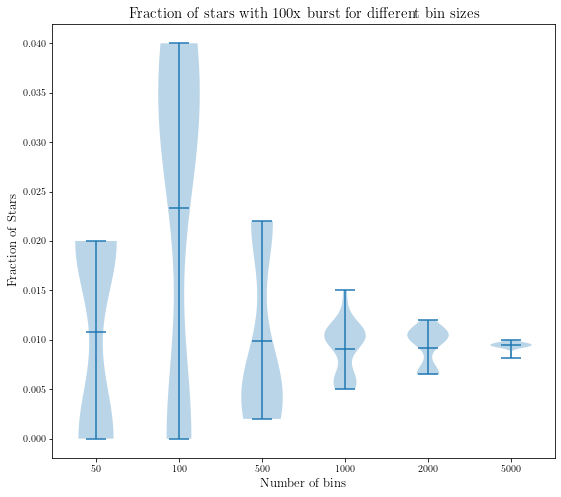

In [415]:
data_1bin_100=[cadence_frac_bursts50_1,cadence_frac_bursts100_1,cadence_frac_bursts500_1,cadence_frac_bursts1000_1,\
      cadence_frac_bursts2000_1,cadence_frac_bursts5000_1]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

# 2 bins

In [416]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts2(full_time,size,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob40:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                    cluster_new.append(cluster_mag[j]-4)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
                    cluster_new.append(cluster_mag[j]-5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total40=0
    total100=0
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_frac40=[]
    frac_val40=0
    burst_frac100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_frac40.append(frac_val40)
        frac_val40=0
        burst_frac100.append(frac_val100)
        frac_val100=0  
    
    fraction40=[]
    fraction100=[]
    for i in range(len(burst_frac40)):
        fraction40.append(burst_frac40[i]/cluster_size)
        fraction100.append(burst_frac100[i]/cluster_size)
        
    return burst_total,burst_total40,burst_total100,burst_frac40,burst_frac100,fraction40,fraction100

## 50 stars

In [417]:
cluster_size50_2=50
steps=t*cadence
burst50_2=np.ones((cluster_size50_2,steps))
L50_2=np.zeros((cluster_size50_2,steps))
prob50_2_40=my_probability(40,2,40)/cadence
prob50_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total50_2=[]
burst_total50_2_40=[]
burst_fraction50_2_40=[]
fraction50_2_40=[]
burst_total50_2_100=[]
burst_fraction50_2_100=[]
fraction50_2_100=[]

for i in range(run):
    burst50_2=np.ones((cluster_size50_2,steps))
    L50_2=np.zeros((cluster_size50_2,steps))
    values50_2=bursts2(t,50,prob50_2_40,prob50_2_100,L50_2,burst50_2)
    burst_total50_2.append(values50_2[0])
    burst_total50_2_40.append(values50_2[1])
    burst_total50_2_100.append(values50_2[2])
    burst_fraction50_2_40.append(values50_2[3])
    burst_fraction50_2_100.append(values50_2[4])
    fraction50_2_40.append(values50_2[5])
    fraction50_2_100.append(values50_2[6])

In [418]:
cadence_frac_bursts50_2_40=[]
cadence_frac_bursts50_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts50_2_40.append(fraction50_2_40[i][j])
        cadence_frac_bursts50_2_100.append(fraction50_2_100[i][j])

## 100 stars

In [419]:
cluster_size100_2=100
steps=t*cadence
burst100_2=np.ones((cluster_size100_2,steps))
L100_2=np.zeros((cluster_size100_2,steps))
prob100_2_40=my_probability(40,2,40)/cadence
prob100_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total100_2=[]
burst_total100_2_40=[]
burst_fraction100_2_40=[]
fraction100_2_40=[]
burst_total100_2_100=[]
burst_fraction100_2_100=[]
fraction100_2_100=[]

for i in range(run):
    burst100_2=np.ones((cluster_size100_2,steps))
    L100_2=np.zeros((cluster_size100_2,steps))
    values100_2=bursts2(t,100,prob100_2_40,prob100_2_100,L100_2,burst100_2)
    burst_total100_2.append(values100_2[0])
    burst_total100_2_40.append(values100_2[1])
    burst_total100_2_100.append(values100_2[2])
    burst_fraction100_2_40.append(values100_2[3])
    burst_fraction100_2_100.append(values100_2[4])
    fraction100_2_40.append(values100_2[5])
    fraction100_2_100.append(values100_2[6])

In [420]:
cadence_frac_bursts100_2_40=[]
cadence_frac_bursts100_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts100_2_40.append(fraction100_2_40[i][j])
        cadence_frac_bursts100_2_100.append(fraction100_2_100[i][j])

## 500 stars

In [421]:
cluster_size500_2=500
steps=t*cadence
burst500_2=np.ones((cluster_size500_2,steps))
L500_2=np.zeros((cluster_size500_2,steps))
prob500_2_40=my_probability(40,2,40)/cadence
prob500_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total500_2=[]
burst_total500_2_40=[]
burst_fraction500_2_40=[]
fraction500_2_40=[]
burst_total500_2_100=[]
burst_fraction500_2_100=[]
fraction500_2_100=[]

for i in range(run):
    burst500_2=np.ones((cluster_size500_2,steps))
    L500_2=np.zeros((cluster_size500_2,steps))
    values500_2=bursts2(t,500,prob500_2_40,prob500_2_100,L500_2,burst500_2)
    burst_total500_2.append(values500_2[0])
    burst_total500_2_40.append(values500_2[1])
    burst_total500_2_100.append(values500_2[2])
    burst_fraction500_2_40.append(values500_2[3])
    burst_fraction500_2_100.append(values500_2[4])
    fraction500_2_40.append(values500_2[5])
    fraction500_2_100.append(values500_2[6])

In [422]:
cadence_frac_bursts500_2_40=[]
cadence_frac_bursts500_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts500_2_40.append(fraction500_2_40[i][j])
        cadence_frac_bursts500_2_100.append(fraction500_2_100[i][j])

## 1000 stars

In [423]:
cluster_size1000_2=1000
steps=t*cadence
burst1000_2=np.ones((cluster_size1000_2,steps))
L1000_2=np.zeros((cluster_size1000_2,steps))
prob1000_2_40=my_probability(40,2,40)/cadence
prob1000_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total1000_2=[]
burst_total1000_2_40=[]
burst_fraction1000_2_40=[]
fraction1000_2_40=[]
burst_total1000_2_100=[]
burst_fraction1000_2_100=[]
fraction1000_2_100=[]

for i in range(run):
    burst1000_2=np.ones((cluster_size1000_2,steps))
    L1000_2=np.zeros((cluster_size1000_2,steps))
    values1000_2=bursts2(t,1000,prob1000_2_40,prob1000_2_100,L1000_2,burst1000_2)
    burst_total1000_2.append(values1000_2[0])
    burst_total1000_2_40.append(values1000_2[1])
    burst_total1000_2_100.append(values1000_2[2])
    burst_fraction1000_2_40.append(values1000_2[3])
    burst_fraction1000_2_100.append(values1000_2[4])
    fraction1000_2_40.append(values1000_2[5])
    fraction1000_2_100.append(values1000_2[6])

In [424]:
cadence_frac_bursts1000_2_40=[]
cadence_frac_bursts1000_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts1000_2_40.append(fraction1000_2_40[i][j])
        cadence_frac_bursts1000_2_100.append(fraction1000_2_100[i][j])

## 2000 stars

In [425]:
cluster_size2000_2=2000
steps=t*cadence
burst2000_2=np.ones((cluster_size2000_2,steps))
L2000_2=np.zeros((cluster_size2000_2,steps))
prob2000_2_40=my_probability(40,2,40)/cadence
prob2000_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total2000_2=[]
burst_total2000_2_40=[]
burst_fraction2000_2_40=[]
fraction2000_2_40=[]
burst_total2000_2_100=[]
burst_fraction2000_2_100=[]
fraction2000_2_100=[]

for i in range(run):
    burst2000_2=np.ones((cluster_size2000_2,steps))
    L2000_2=np.zeros((cluster_size2000_2,steps))
    values2000_2=bursts2(t,2000,prob2000_2_40,prob2000_2_100,L2000_2,burst2000_2)
    burst_total2000_2.append(values2000_2[0])
    burst_total2000_2_40.append(values2000_2[1])
    burst_total2000_2_100.append(values2000_2[2])
    burst_fraction2000_2_40.append(values2000_2[3])
    burst_fraction2000_2_100.append(values2000_2[4])
    fraction2000_2_40.append(values2000_2[5])
    fraction2000_2_100.append(values2000_2[6])

In [426]:
cadence_frac_bursts2000_2_40=[]
cadence_frac_bursts2000_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts2000_2_40.append(fraction2000_2_40[i][j])
        cadence_frac_bursts2000_2_100.append(fraction2000_2_100[i][j])

## 5000 stars

In [427]:
cluster_size5000_2=5000
steps=t*cadence
burst5000_2=np.ones((cluster_size5000_2,steps))
L5000_2=np.zeros((cluster_size5000_2,steps))
prob5000_2_40=my_probability(40,2,40)/cadence
prob5000_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total5000_2=[]
burst_total5000_2_40=[]
burst_fraction5000_2_40=[]
fraction5000_2_40=[]
burst_total5000_2_100=[]
burst_fraction5000_2_100=[]
fraction5000_2_100=[]

for i in range(run):
    burst5000_2=np.ones((cluster_size5000_2,steps))
    L5000_2=np.zeros((cluster_size5000_2,steps))
    values5000_2=bursts2(t,500,prob5000_2_40,prob5000_2_100,L5000_2,burst5000_2)
    burst_total5000_2.append(values5000_2[0])
    burst_total5000_2_40.append(values5000_2[1])
    burst_total5000_2_100.append(values5000_2[2])
    burst_fraction5000_2_40.append(values5000_2[3])
    burst_fraction5000_2_100.append(values5000_2[4])
    fraction5000_2_40.append(values5000_2[5])
    fraction5000_2_100.append(values5000_2[6])

In [428]:
cadence_frac_bursts5000_2_40=[]
cadence_frac_bursts5000_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts5000_2_40.append(fraction5000_2_40[i][j])
        cadence_frac_bursts5000_2_100.append(fraction5000_2_100[i][j])

[]

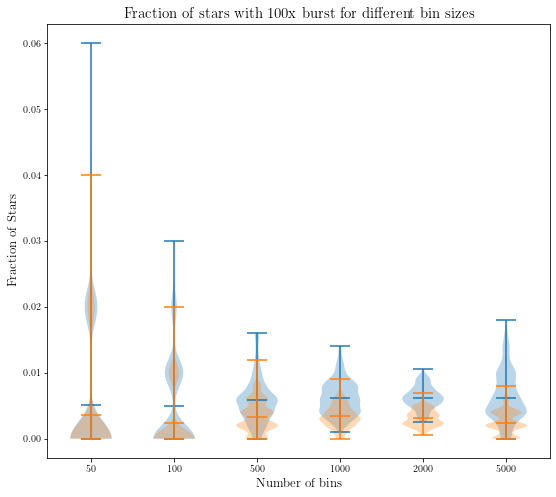

In [429]:
data_2bin_40=[cadence_frac_bursts50_2_40,cadence_frac_bursts100_2_40,cadence_frac_bursts500_2_40,\
              cadence_frac_bursts1000_2_40,cadence_frac_bursts2000_2_40,cadence_frac_bursts5000_2_40]
data_2bin_100=[cadence_frac_bursts50_2_100,cadence_frac_bursts100_2_100,cadence_frac_bursts500_2_100,\
              cadence_frac_bursts1000_2_100,cadence_frac_bursts2000_2_100,cadence_frac_bursts5000_2_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_2bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_2bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

# 3 bins

In [430]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts3(full_time,size,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob16:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                    cluster_new.append(cluster_mag[j]-3)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                    cluster_new.append(cluster_mag[j]-4)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
                    cluster_new.append(cluster_mag[j]-5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total16=0
    total40=0
    total100=0
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_frac16=[]
    frac_val16=0
    burst_frac40=[]
    frac_val40=0
    burst_frac100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_frac16.append(frac_val16)
        frac_val16=0
        burst_frac40.append(frac_val40)
        frac_val40=0
        burst_frac100.append(frac_val100)
        frac_val100=0  
    
    fraction16=[]
    fraction40=[]
    fraction100=[]
    for i in range(len(burst_frac16)):
        fraction16.append(burst_frac16[i]/cluster_size)
        fraction40.append(burst_frac40[i]/cluster_size)
        fraction100.append(burst_frac100[i]/cluster_size)
        
    return burst_total,burst_total16,burst_total40,burst_total100,burst_frac16,burst_frac40,burst_frac100,\
fraction16,fraction40,fraction100

## 50 stars

In [431]:
cluster_size50_3=50
steps=t*cadence
burst50_3=np.ones((cluster_size50_3,steps))
L50_3=np.zeros((cluster_size50_3,steps))
prob50_3_16=my_probability(16,3,16)/cadence
prob50_3_40=my_probability(40,2,40)/cadence
prob50_3_100=my_probability(100,2,100)/cadence

burst_total50_3=[]
burst_total50_3_16=[]
burst_fraction50_3_16=[]
fraction50_3_16=[]
burst_total50_3_40=[]
burst_fraction50_3_40=[]
fraction50_3_40=[]
burst_total50_3_100=[]
burst_fraction50_3_100=[]
fraction50_3_100=[]

for i in range(run):
    burst50_3=np.ones((cluster_size50_3,steps))
    L50_3=np.zeros((cluster_size50_3,steps))
    values50_3=bursts3(t,50,prob50_3_16,prob50_3_40,prob50_3_100,L50_3,burst50_3)
    burst_total50_3.append(values50_3[0])
    burst_total50_3_16.append(values50_3[1])
    burst_total50_3_40.append(values50_3[2])
    burst_total50_3_100.append(values50_3[3])
    burst_fraction50_3_16.append(values50_3[4])
    burst_fraction50_3_40.append(values50_3[5])
    burst_fraction50_3_100.append(values50_3[6])
    fraction50_3_16.append(values50_3[7])
    fraction50_3_40.append(values50_3[8])
    fraction50_3_100.append(values50_3[9])

In [432]:
cadence_frac_bursts50_3_16=[]
cadence_frac_bursts50_3_40=[]
cadence_frac_bursts50_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts50_3_16.append(fraction50_3_16[i][j])
        cadence_frac_bursts50_3_40.append(fraction50_3_40[i][j])
        cadence_frac_bursts50_3_100.append(fraction50_3_100[i][j])

## 100 stars

In [433]:
cluster_size100_3=100
steps=t*cadence
burst100_3=np.ones((cluster_size100_3,steps))
L100_3=np.zeros((cluster_size100_3,steps))
prob100_3_16=my_probability(16,3,16)/cadence
prob100_3_40=my_probability(40,2,40)/cadence
prob100_3_100=my_probability(100,2,100)/cadence

burst_total100_3=[]
burst_total100_3_16=[]
burst_fraction100_3_16=[]
fraction100_3_16=[]
burst_total100_3_40=[]
burst_fraction100_3_40=[]
fraction100_3_40=[]
burst_total100_3_100=[]
burst_fraction100_3_100=[]
fraction100_3_100=[]

for i in range(run):
    burst100_3=np.ones((cluster_size100_3,steps))
    L100_3=np.zeros((cluster_size100_3,steps))
    values100_3=bursts3(t,100,prob100_3_16,prob100_3_40,prob100_3_100,L100_3,burst100_3)
    burst_total100_3.append(values100_3[0])
    burst_total100_3_16.append(values100_3[1])
    burst_total100_3_40.append(values100_3[2])
    burst_total100_3_100.append(values100_3[3])
    burst_fraction100_3_16.append(values100_3[4])
    burst_fraction100_3_40.append(values100_3[5])
    burst_fraction100_3_100.append(values100_3[6])
    fraction100_3_16.append(values100_3[7])
    fraction100_3_40.append(values100_3[8])
    fraction100_3_100.append(values100_3[9])

In [434]:
cadence_frac_bursts100_3_16=[]
cadence_frac_bursts100_3_40=[]
cadence_frac_bursts100_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts100_3_16.append(fraction100_3_16[i][j])
        cadence_frac_bursts100_3_40.append(fraction100_3_40[i][j])
        cadence_frac_bursts100_3_100.append(fraction100_3_100[i][j])

## 500 stars

In [435]:
cluster_size500_3=500
steps=t*cadence
burst500_3=np.ones((cluster_size500_3,steps))
L500_3=np.zeros((cluster_size500_3,steps))
prob500_3_16=my_probability(16,3,16)/cadence
prob500_3_40=my_probability(40,3,40)/cadence
prob500_3_100=my_probability(100,3,100)/cadence

burst_total500_3=[]
burst_total500_3_16=[]
burst_fraction500_3_16=[]
fraction500_3_16=[]
burst_total500_3_40=[]
burst_fraction500_3_40=[]
fraction500_3_40=[]
burst_total500_3_100=[]
burst_fraction500_3_100=[]
fraction500_3_100=[]

for i in range(run):
    burst500_3=np.ones((cluster_size500_3,steps))
    L500_3=np.zeros((cluster_size500_3,steps))
    values500_3=bursts3(t,500,prob500_3_16,prob500_3_40,prob500_3_100,L500_3,burst500_3)
    burst_total500_3.append(values500_3[0])
    burst_total500_3_16.append(values500_3[1])
    burst_total500_3_40.append(values500_3[2])
    burst_total500_3_100.append(values500_3[3])
    burst_fraction500_3_16.append(values500_3[4])
    burst_fraction500_3_40.append(values500_3[5])
    burst_fraction500_3_100.append(values500_3[6])
    fraction500_3_16.append(values500_3[7])
    fraction500_3_40.append(values500_3[8])
    fraction500_3_100.append(values500_3[9])

In [436]:
cadence_frac_bursts500_3_16=[]
cadence_frac_bursts500_3_40=[]
cadence_frac_bursts500_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts500_3_16.append(fraction500_3_16[i][j])
        cadence_frac_bursts500_3_40.append(fraction500_3_40[i][j])
        cadence_frac_bursts500_3_100.append(fraction500_3_100[i][j])

## 1000 stars

In [437]:
cluster_size1000_3=1000
steps=t*cadence
burst1000_3=np.ones((cluster_size1000_3,steps))
L1000_3=np.zeros((cluster_size1000_3,steps))
prob1000_3_16=my_probability(16,3,16)/cadence
prob1000_3_40=my_probability(40,3,40)/cadence
prob1000_3_100=my_probability(100,3,100)/cadence

burst_total1000_3=[]
burst_total1000_3_16=[]
burst_fraction1000_3_16=[]
fraction1000_3_16=[]
burst_total1000_3_40=[]
burst_fraction1000_3_40=[]
fraction1000_3_40=[]
burst_total1000_3_100=[]
burst_fraction1000_3_100=[]
fraction1000_3_100=[]

for i in range(run):
    burst1000_3=np.ones((cluster_size1000_3,steps))
    L1000_3=np.zeros((cluster_size1000_3,steps))
    values1000_3=bursts3(t,1000,prob1000_3_16,prob1000_3_40,prob1000_3_100,L1000_3,burst1000_3)
    burst_total1000_3.append(values1000_3[0])
    burst_total1000_3_16.append(values1000_3[1])
    burst_total1000_3_40.append(values1000_3[2])
    burst_total1000_3_100.append(values1000_3[3])
    burst_fraction1000_3_16.append(values1000_3[4])
    burst_fraction1000_3_40.append(values1000_3[5])
    burst_fraction1000_3_100.append(values1000_3[6])
    fraction1000_3_16.append(values1000_3[7])
    fraction1000_3_40.append(values1000_3[8])
    fraction1000_3_100.append(values1000_3[9])

In [438]:
cadence_frac_bursts1000_3_16=[]
cadence_frac_bursts1000_3_40=[]
cadence_frac_bursts1000_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts1000_3_16.append(fraction1000_3_16[i][j])
        cadence_frac_bursts1000_3_40.append(fraction1000_3_40[i][j])
        cadence_frac_bursts1000_3_100.append(fraction1000_3_100[i][j])

## 2000 stars

In [439]:
cluster_size2000_3=2000
steps=t*cadence
burst2000_3=np.ones((cluster_size2000_3,steps))
L2000_3=np.zeros((cluster_size2000_3,steps))
prob2000_3_16=my_probability(16,3,16)/cadence
prob2000_3_40=my_probability(40,3,40)/cadence
prob2000_3_100=my_probability(100,3,100)/cadence

burst_total2000_3=[]
burst_total2000_3_16=[]
burst_fraction2000_3_16=[]
fraction2000_3_16=[]
burst_total2000_3_40=[]
burst_fraction2000_3_40=[]
fraction2000_3_40=[]
burst_total2000_3_100=[]
burst_fraction2000_3_100=[]
fraction2000_3_100=[]

for i in range(run):
    burst2000_3=np.ones((cluster_size2000_3,steps))
    L2000_3=np.zeros((cluster_size2000_3,steps))
    values2000_3=bursts3(t,2000,prob2000_3_16,prob2000_3_40,prob2000_3_100,L2000_3,burst2000_3)
    burst_total2000_3.append(values2000_3[0])
    burst_total2000_3_16.append(values2000_3[1])
    burst_total2000_3_40.append(values2000_3[2])
    burst_total2000_3_100.append(values2000_3[3])
    burst_fraction2000_3_16.append(values2000_3[4])
    burst_fraction2000_3_40.append(values2000_3[5])
    burst_fraction2000_3_100.append(values2000_3[6])
    fraction2000_3_16.append(values2000_3[7])
    fraction2000_3_40.append(values2000_3[8])
    fraction2000_3_100.append(values2000_3[9])

In [440]:
cadence_frac_bursts2000_3_16=[]
cadence_frac_bursts2000_3_40=[]
cadence_frac_bursts2000_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts2000_3_16.append(fraction2000_3_16[i][j])
        cadence_frac_bursts2000_3_40.append(fraction2000_3_40[i][j])
        cadence_frac_bursts2000_3_100.append(fraction2000_3_100[i][j])

## 5000 stars

In [444]:
cluster_size5000_3=5000
steps=t*cadence
burst5000_3=np.ones((cluster_size5000_3,steps))
L5000_3=np.zeros((cluster_size5000_3,steps))
prob5000_3_16=my_probability(16,3,16)/cadence
prob5000_3_40=my_probability(40,3,40)/cadence
prob5000_3_100=my_probability(100,3,100)/cadence

burst_total5000_3=[]
burst_total5000_3_16=[]
burst_fraction5000_3_16=[]
fraction5000_3_16=[]
burst_total5000_3_40=[]
burst_fraction5000_3_40=[]
fraction5000_3_40=[]
burst_total5000_3_100=[]
burst_fraction5000_3_100=[]
fraction5000_3_100=[]

for i in range(run):
    print(i)
    burst5000_3=np.ones((cluster_size5000_3,steps))
    L5000_3=np.zeros((cluster_size5000_3,steps))
    values5000_3=bursts3(t,5000,prob5000_3_16,prob5000_3_40,prob5000_3_100,L5000_3,burst5000_3)
    burst_total5000_3.append(values5000_3[0])
    burst_total5000_3_16.append(values5000_3[1])
    burst_total5000_3_40.append(values5000_3[2])
    burst_total5000_3_100.append(values5000_3[3])
    burst_fraction5000_3_16.append(values5000_3[4])
    burst_fraction5000_3_40.append(values5000_3[5])
    burst_fraction5000_3_100.append(values5000_3[6])
    fraction5000_3_16.append(values5000_3[7])
    fraction5000_3_40.append(values5000_3[8])
    fraction5000_3_100.append(values5000_3[9])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [445]:
cadence_frac_bursts5000_3_16=[]
cadence_frac_bursts5000_3_40=[]
cadence_frac_bursts5000_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts5000_3_16.append(fraction5000_3_16[i][j])
        cadence_frac_bursts5000_3_40.append(fraction5000_3_40[i][j])
        cadence_frac_bursts5000_3_100.append(fraction5000_3_100[i][j])

[]

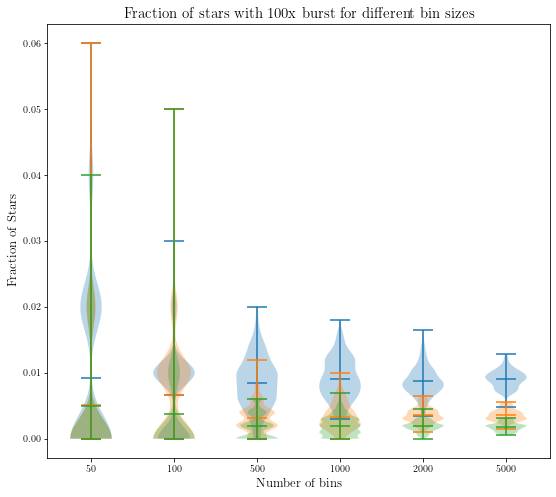

In [446]:
data_3bin_16=[cadence_frac_bursts50_3_16,cadence_frac_bursts100_3_16,cadence_frac_bursts500_3_16,\
              cadence_frac_bursts1000_3_16,cadence_frac_bursts2000_3_16,cadence_frac_bursts5000_3_16]
data_3bin_40=[cadence_frac_bursts50_3_40,cadence_frac_bursts100_3_40,cadence_frac_bursts500_3_40,\
              cadence_frac_bursts1000_3_40,cadence_frac_bursts2000_3_40,cadence_frac_bursts5000_3_40]
data_3bin_100=[cadence_frac_bursts50_3_100,cadence_frac_bursts100_3_100,cadence_frac_bursts500_3_100,\
              cadence_frac_bursts1000_3_100,cadence_frac_bursts2000_3_100,cadence_frac_bursts5000_3_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_3bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_3bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_3bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## 4 bins

In [461]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts4(full_time,size,prob6,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob6=prob6
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob6:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob6 and prob>burst_prob16:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-2
                    cluster_new.append(cluster_mag[j]-2)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                    cluster_new.append(cluster_mag[j]-3)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                    cluster_new.append(cluster_mag[j]-4)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
                    cluster_new.append(cluster_mag[j]-5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
                total6+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_frac6=[]
    frac_val6=0
    burst_frac16=[]
    frac_val16=0
    burst_frac40=[]
    frac_val40=0
    burst_frac100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
                frac_val6+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_frac6.append(frac_val6)
        frac_val6=0
        burst_frac16.append(frac_val16)
        frac_val16=0
        burst_frac40.append(frac_val40)
        frac_val40=0
        burst_frac100.append(frac_val100)
        frac_val100=0  
    
    fraction6=[]
    fraction16=[]
    fraction40=[]
    fraction100=[]
    for i in range(len(burst_frac16)):
        fraction6.append(burst_frac6[i]/cluster_size)
        fraction16.append(burst_frac16[i]/cluster_size)
        fraction40.append(burst_frac40[i]/cluster_size)
        fraction100.append(burst_frac100[i]/cluster_size)
        
    return burst_total,burst_total6,burst_total16,burst_total40,burst_total100,burst_frac6,burst_frac16,\
burst_frac40,burst_frac100,fraction6,fraction16,fraction40,fraction100

## 50 stars

In [462]:
cluster_size50_4=50
steps=t*cadence
burst50_4=np.ones((cluster_size50_4,steps))
L50_4=np.zeros((cluster_size50_4,steps))
prob50_4_6=my_probability(6.3,4,6.3)
prob50_4_16=my_probability(16,4,16)/cadence
prob50_4_40=my_probability(40,4,40)/cadence
prob50_4_100=my_probability(100,4,100)/cadence

burst_total50_4=[]
burst_total50_4_6=[]
burst_fraction50_4_6=[]
fraction50_4_6=[]
burst_total50_4_16=[]
burst_fraction50_4_16=[]
fraction50_4_16=[]
burst_total50_4_40=[]
burst_fraction50_4_40=[]
fraction50_4_40=[]
burst_total50_4_100=[]
burst_fraction50_4_100=[]
fraction50_4_100=[]

for i in range(run):
    burst50_4=np.ones((cluster_size50_4,steps))
    L50_4=np.zeros((cluster_size50_4,steps))
    values50_4=bursts4(t,50,prob50_4_6,prob50_4_16,prob50_4_40,prob50_4_100,L50_4,burst50_4)
    burst_total50_4.append(values50_4[0])
    burst_total50_4_6.append(values50_4[1])
    burst_total50_4_16.append(values50_4[2])
    burst_total50_4_40.append(values50_4[3])
    burst_total50_4_100.append(values50_4[4])
    burst_fraction50_4_6.append(values50_4[5])
    burst_fraction50_4_16.append(values50_4[6])
    burst_fraction50_4_40.append(values50_4[7])
    burst_fraction50_4_100.append(values50_4[8])
    fraction50_4_6.append(values50_4[9])
    fraction50_4_16.append(values50_4[10])
    fraction50_4_40.append(values50_4[11])
    fraction50_4_100.append(values50_4[12])

In [463]:
cadence_frac_bursts50_4_6=[]
cadence_frac_bursts50_4_16=[]
cadence_frac_bursts50_4_40=[]
cadence_frac_bursts50_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts50_4_6.append(fraction50_4_6[i][j])        
        cadence_frac_bursts50_4_16.append(fraction50_4_16[i][j])
        cadence_frac_bursts50_4_40.append(fraction50_4_40[i][j])
        cadence_frac_bursts50_4_100.append(fraction50_4_100[i][j])

## 100 stars

In [464]:
cluster_size100_4=100
steps=t*cadence
burst100_4=np.ones((cluster_size100_4,steps))
L100_4=np.zeros((cluster_size100_4,steps))
prob100_4_6=my_probability(6.3,4,6.3)
prob100_4_16=my_probability(16,4,16)/cadence
prob100_4_40=my_probability(40,4,40)/cadence
prob100_4_100=my_probability(100,4,100)/cadence

burst_total100_4=[]
burst_total100_4_6=[]
burst_fraction100_4_6=[]
fraction100_4_6=[]
burst_total100_4_16=[]
burst_fraction100_4_16=[]
fraction100_4_16=[]
burst_total100_4_40=[]
burst_fraction100_4_40=[]
fraction100_4_40=[]
burst_total100_4_100=[]
burst_fraction100_4_100=[]
fraction100_4_100=[]

for i in range(run):
    burst100_4=np.ones((cluster_size100_4,steps))
    L100_4=np.zeros((cluster_size100_4,steps))
    values100_4=bursts4(t,100,prob100_4_6,prob100_4_16,prob100_4_40,prob100_4_100,L100_4,burst100_4)
    burst_total100_4.append(values100_4[0])
    burst_total100_4_6.append(values100_4[1])
    burst_total100_4_16.append(values100_4[2])
    burst_total100_4_40.append(values100_4[3])
    burst_total100_4_100.append(values100_4[4])
    burst_fraction100_4_6.append(values100_4[5])
    burst_fraction100_4_16.append(values100_4[6])
    burst_fraction100_4_40.append(values100_4[7])
    burst_fraction100_4_100.append(values100_4[8])
    fraction100_4_6.append(values100_4[9])
    fraction100_4_16.append(values100_4[10])
    fraction100_4_40.append(values100_4[11])
    fraction100_4_100.append(values100_4[12])

In [465]:
cadence_frac_bursts100_4_6=[]
cadence_frac_bursts100_4_16=[]
cadence_frac_bursts100_4_40=[]
cadence_frac_bursts100_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts100_4_6.append(fraction100_4_6[i][j])        
        cadence_frac_bursts100_4_16.append(fraction100_4_16[i][j])
        cadence_frac_bursts100_4_40.append(fraction100_4_40[i][j])
        cadence_frac_bursts100_4_100.append(fraction100_4_100[i][j])

## 500 stars

In [466]:
cluster_size500_4=500
steps=t*cadence
burst500_4=np.ones((cluster_size500_4,steps))
L500_4=np.zeros((cluster_size500_4,steps))
prob500_4_6=my_probability(6.3,4,6.3)
prob500_4_16=my_probability(16,4,16)/cadence
prob500_4_40=my_probability(40,4,40)/cadence
prob500_4_100=my_probability(100,4,100)/cadence

burst_total500_4=[]
burst_total500_4_6=[]
burst_fraction500_4_6=[]
fraction500_4_6=[]
burst_total500_4_16=[]
burst_fraction500_4_16=[]
fraction500_4_16=[]
burst_total500_4_40=[]
burst_fraction500_4_40=[]
fraction500_4_40=[]
burst_total500_4_100=[]
burst_fraction500_4_100=[]
fraction500_4_100=[]

for i in range(run):
    burst500_4=np.ones((cluster_size500_4,steps))
    L500_4=np.zeros((cluster_size500_4,steps))
    values500_4=bursts4(t,500,prob500_4_6,prob500_4_16,prob500_4_40,prob500_4_100,L500_4,burst500_4)
    burst_total500_4.append(values500_4[0])
    burst_total500_4_6.append(values500_4[1])
    burst_total500_4_16.append(values500_4[2])
    burst_total500_4_40.append(values500_4[3])
    burst_total500_4_100.append(values500_4[4])
    burst_fraction500_4_6.append(values500_4[5])
    burst_fraction500_4_16.append(values500_4[6])
    burst_fraction500_4_40.append(values500_4[7])
    burst_fraction500_4_100.append(values500_4[8])
    fraction500_4_6.append(values500_4[9])
    fraction500_4_16.append(values500_4[10])
    fraction500_4_40.append(values500_4[11])
    fraction500_4_100.append(values500_4[12])

In [467]:
cadence_frac_bursts500_4_6=[]
cadence_frac_bursts500_4_16=[]
cadence_frac_bursts500_4_40=[]
cadence_frac_bursts500_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts500_4_6.append(fraction500_4_6[i][j])        
        cadence_frac_bursts500_4_16.append(fraction500_4_16[i][j])
        cadence_frac_bursts500_4_40.append(fraction500_4_40[i][j])
        cadence_frac_bursts500_4_100.append(fraction500_4_100[i][j])

## 1000 stars

In [468]:
cluster_size1000_4=1000
steps=t*cadence
burst1000_4=np.ones((cluster_size1000_4,steps))
L1000_4=np.zeros((cluster_size1000_4,steps))
prob1000_4_6=my_probability(6.3,4,6.3)
prob1000_4_16=my_probability(16,4,16)/cadence
prob1000_4_40=my_probability(40,4,40)/cadence
prob1000_4_100=my_probability(100,4,100)/cadence

burst_total1000_4=[]
burst_total1000_4_6=[]
burst_fraction1000_4_6=[]
fraction1000_4_6=[]
burst_total1000_4_16=[]
burst_fraction1000_4_16=[]
fraction1000_4_16=[]
burst_total1000_4_40=[]
burst_fraction1000_4_40=[]
fraction1000_4_40=[]
burst_total1000_4_100=[]
burst_fraction1000_4_100=[]
fraction1000_4_100=[]

for i in range(run):
    burst1000_4=np.ones((cluster_size1000_4,steps))
    L1000_4=np.zeros((cluster_size1000_4,steps))
    values1000_4=bursts4(t,1000,prob1000_4_6,prob1000_4_16,prob1000_4_40,prob1000_4_100,L1000_4,burst1000_4)
    burst_total1000_4.append(values1000_4[0])
    burst_total1000_4_6.append(values1000_4[1])
    burst_total1000_4_16.append(values1000_4[2])
    burst_total1000_4_40.append(values1000_4[3])
    burst_total1000_4_100.append(values1000_4[4])
    burst_fraction1000_4_6.append(values1000_4[5])
    burst_fraction1000_4_16.append(values1000_4[6])
    burst_fraction1000_4_40.append(values1000_4[7])
    burst_fraction1000_4_100.append(values1000_4[8])
    fraction1000_4_6.append(values1000_4[9])
    fraction1000_4_16.append(values1000_4[10])
    fraction1000_4_40.append(values1000_4[11])
    fraction1000_4_100.append(values1000_4[12])

In [469]:
cadence_frac_bursts1000_4_6=[]
cadence_frac_bursts1000_4_16=[]
cadence_frac_bursts1000_4_40=[]
cadence_frac_bursts1000_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts1000_4_6.append(fraction1000_4_6[i][j])        
        cadence_frac_bursts1000_4_16.append(fraction1000_4_16[i][j])
        cadence_frac_bursts1000_4_40.append(fraction1000_4_40[i][j])
        cadence_frac_bursts1000_4_100.append(fraction1000_4_100[i][j])

## 2000 stars

In [470]:
cluster_size2000_4=2000
steps=t*cadence
burst2000_4=np.ones((cluster_size2000_4,steps))
L2000_4=np.zeros((cluster_size2000_4,steps))
prob2000_4_6=my_probability(6.3,4,6.3)
prob2000_4_16=my_probability(16,4,16)/cadence
prob2000_4_40=my_probability(40,4,40)/cadence
prob2000_4_100=my_probability(100,4,100)/cadence

burst_total2000_4=[]
burst_total2000_4_6=[]
burst_fraction2000_4_6=[]
fraction2000_4_6=[]
burst_total2000_4_16=[]
burst_fraction2000_4_16=[]
fraction2000_4_16=[]
burst_total2000_4_40=[]
burst_fraction2000_4_40=[]
fraction2000_4_40=[]
burst_total2000_4_100=[]
burst_fraction2000_4_100=[]
fraction2000_4_100=[]

for i in range(run):
    burst2000_4=np.ones((cluster_size2000_4,steps))
    L2000_4=np.zeros((cluster_size2000_4,steps))
    values2000_4=bursts4(t,2000,prob2000_4_6,prob2000_4_16,prob2000_4_40,prob2000_4_100,L2000_4,burst2000_4)
    burst_total2000_4.append(values2000_4[0])
    burst_total2000_4_6.append(values2000_4[1])
    burst_total2000_4_16.append(values2000_4[2])
    burst_total2000_4_40.append(values2000_4[3])
    burst_total2000_4_100.append(values2000_4[4])
    burst_fraction2000_4_6.append(values2000_4[5])
    burst_fraction2000_4_16.append(values2000_4[6])
    burst_fraction2000_4_40.append(values2000_4[7])
    burst_fraction2000_4_100.append(values2000_4[8])
    fraction2000_4_6.append(values2000_4[9])
    fraction2000_4_16.append(values2000_4[10])
    fraction2000_4_40.append(values2000_4[11])
    fraction2000_4_100.append(values2000_4[12])

In [471]:
cadence_frac_bursts2000_4_6=[]
cadence_frac_bursts2000_4_16=[]
cadence_frac_bursts2000_4_40=[]
cadence_frac_bursts2000_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts2000_4_6.append(fraction2000_4_6[i][j])        
        cadence_frac_bursts2000_4_16.append(fraction2000_4_16[i][j])
        cadence_frac_bursts2000_4_40.append(fraction2000_4_40[i][j])
        cadence_frac_bursts2000_4_100.append(fraction2000_4_100[i][j])

## 5000 stars

In [472]:
cluster_size5000_4=5000
steps=t*cadence
burst5000_4=np.ones((cluster_size5000_4,steps))
L5000_4=np.zeros((cluster_size5000_4,steps))
prob5000_4_6=my_probability(6.3,4,6.3)
prob5000_4_16=my_probability(16,4,16)/cadence
prob5000_4_40=my_probability(40,4,40)/cadence
prob5000_4_100=my_probability(100,4,100)/cadence

burst_total5000_4=[]
burst_total5000_4_6=[]
burst_fraction5000_4_6=[]
fraction5000_4_6=[]
burst_total5000_4_16=[]
burst_fraction5000_4_16=[]
fraction5000_4_16=[]
burst_total5000_4_40=[]
burst_fraction5000_4_40=[]
fraction5000_4_40=[]
burst_total5000_4_100=[]
burst_fraction5000_4_100=[]
fraction5000_4_100=[]

for i in range(run):
    print(i)
    burst5000_4=np.ones((cluster_size5000_4,steps))
    L5000_4=np.zeros((cluster_size5000_4,steps))
    values5000_4=bursts4(t,5000,prob5000_4_6,prob5000_4_16,prob5000_4_40,prob5000_4_100,L5000_4,burst5000_4)
    burst_total5000_4.append(values5000_4[0])
    burst_total5000_4_6.append(values5000_4[1])
    burst_total5000_4_16.append(values5000_4[2])
    burst_total5000_4_40.append(values5000_4[3])
    burst_total5000_4_100.append(values5000_4[4])
    burst_fraction5000_4_6.append(values5000_4[5])
    burst_fraction5000_4_16.append(values5000_4[6])
    burst_fraction5000_4_40.append(values5000_4[7])
    burst_fraction5000_4_100.append(values5000_4[8])
    fraction5000_4_6.append(values5000_4[9])
    fraction5000_4_16.append(values5000_4[10])
    fraction5000_4_40.append(values5000_4[11])
    fraction5000_4_100.append(values5000_4[12])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [473]:
cadence_frac_bursts5000_4_6=[]
cadence_frac_bursts5000_4_16=[]
cadence_frac_bursts5000_4_40=[]
cadence_frac_bursts5000_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts5000_4_6.append(fraction5000_4_6[i][j])        
        cadence_frac_bursts5000_4_16.append(fraction5000_4_16[i][j])
        cadence_frac_bursts5000_4_40.append(fraction5000_4_40[i][j])
        cadence_frac_bursts5000_4_100.append(fraction5000_4_100[i][j])

[]

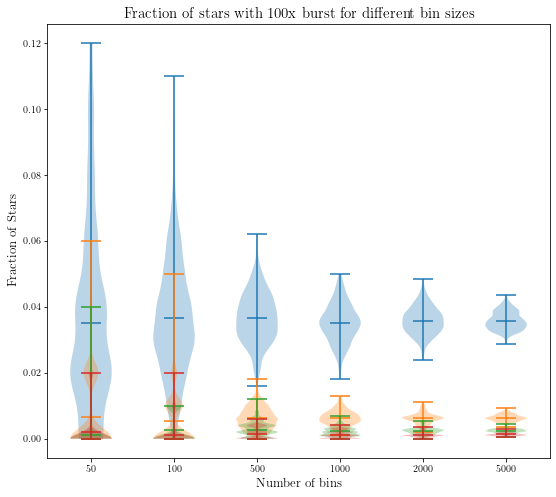

In [474]:
data_4bin_6=[cadence_frac_bursts50_4_6,cadence_frac_bursts100_4_6,cadence_frac_bursts500_4_6,\
              cadence_frac_bursts1000_4_6,cadence_frac_bursts2000_4_6,cadence_frac_bursts5000_4_6]
data_4bin_16=[cadence_frac_bursts50_4_16,cadence_frac_bursts100_4_16,cadence_frac_bursts500_4_16,\
              cadence_frac_bursts1000_4_16,cadence_frac_bursts2000_4_16,cadence_frac_bursts5000_4_16]
data_4bin_40=[cadence_frac_bursts50_4_40,cadence_frac_bursts100_4_40,cadence_frac_bursts500_4_40,\
              cadence_frac_bursts1000_4_40,cadence_frac_bursts2000_4_40,cadence_frac_bursts5000_4_40]
data_4bin_100=[cadence_frac_bursts50_4_100,cadence_frac_bursts100_4_100,cadence_frac_bursts500_4_100,\
              cadence_frac_bursts1000_4_100,cadence_frac_bursts2000_4_100,cadence_frac_bursts5000_4_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_4bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_4bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_4bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_4bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## 5 bins

In [475]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts5(full_time,size,prob3,prob6,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob3=prob3
    burst_prob6=prob6
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob3:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob3 and prob>burst_prob6:
                    burst[j,i:7+i]=np.nan
                    L[j,i:7+i]=cluster_mag[j]-1.25
                    cluster_new.append(cluster_mag[j]-1.25)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob6 and prob>burst_prob16:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-2
                    cluster_new.append(cluster_mag[j]-2)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                    cluster_new.append(cluster_mag[j]-3)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                    cluster_new.append(cluster_mag[j]-4)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
                    cluster_new.append(cluster_mag[j]-5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total3=0
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total3=[]
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
                total3+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
                total6+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total3.append(total3)
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_frac3=[]
    frac_val3=0
    burst_frac6=[]
    frac_val6=0
    burst_frac16=[]
    frac_val16=0
    burst_frac40=[]
    frac_val40=0
    burst_frac100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
                frac_val3+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
                frac_val6+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_frac3.append(frac_val3)
        frac_val3=0
        burst_frac6.append(frac_val6)
        frac_val6=0
        burst_frac16.append(frac_val16)
        frac_val16=0
        burst_frac40.append(frac_val40)
        frac_val40=0
        burst_frac100.append(frac_val100)
        frac_val100=0  
    
    fraction3=[]
    fraction6=[]
    fraction16=[]
    fraction40=[]
    fraction100=[]
    for i in range(len(burst_frac16)):
        fraction3.append(burst_frac3[i]/cluster_size)
        fraction6.append(burst_frac6[i]/cluster_size)
        fraction16.append(burst_frac16[i]/cluster_size)
        fraction40.append(burst_frac40[i]/cluster_size)
        fraction100.append(burst_frac100[i]/cluster_size)
        
    return burst_total,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,burst_frac3,burst_frac6,\
burst_frac16,burst_frac40,burst_frac100,fraction3,fraction6,fraction16,fraction40,fraction100

## 50 stars

In [476]:
cluster_size50_5=50
steps=t*cadence
burst50_5=np.ones((cluster_size50_5,steps))
L50_5=np.zeros((cluster_size50_5,steps))
prob50_5_3=my_probability(3.2,5,3.2)
prob50_5_6=my_probability(6.3,5,6.3)
prob50_5_16=my_probability(16,5,16)/cadence
prob50_5_40=my_probability(40,5,40)/cadence
prob50_5_100=my_probability(100,5,100)/cadence

burst_total50_5=[]
burst_total50_5_3=[]
burst_fraction50_5_3=[]
fraction50_5_3=[]
burst_total50_5_6=[]
burst_fraction50_5_6=[]
fraction50_5_6=[]
burst_total50_5_16=[]
burst_fraction50_5_16=[]
fraction50_5_16=[]
burst_total50_5_40=[]
burst_fraction50_5_40=[]
fraction50_5_40=[]
burst_total50_5_100=[]
burst_fraction50_5_100=[]
fraction50_5_100=[]

for i in range(run):
    burst50_5=np.ones((cluster_size50_5,steps))
    L50_5=np.zeros((cluster_size50_5,steps))
    values50_5=bursts5(t,50,prob50_5_3,prob50_5_6,prob50_5_16,prob50_5_40,prob50_5_100,L50_5,burst50_5)
    burst_total50_5.append(values50_5[0])
    burst_total50_5_3.append(values50_5[1])
    burst_total50_5_6.append(values50_5[2])
    burst_total50_5_16.append(values50_5[3])
    burst_total50_5_40.append(values50_5[4])
    burst_total50_5_100.append(values50_5[5])
    burst_fraction50_5_3.append(values50_5[6])
    burst_fraction50_5_6.append(values50_5[7])
    burst_fraction50_5_16.append(values50_5[8])
    burst_fraction50_5_40.append(values50_5[9])
    burst_fraction50_5_100.append(values50_5[10])
    fraction50_5_3.append(values50_5[11])
    fraction50_5_6.append(values50_5[12])
    fraction50_5_16.append(values50_5[13])
    fraction50_5_40.append(values50_5[14])
    fraction50_5_100.append(values50_5[15])

In [477]:
cadence_frac_bursts50_5_3=[]
cadence_frac_bursts50_5_6=[]
cadence_frac_bursts50_5_16=[]
cadence_frac_bursts50_5_40=[]
cadence_frac_bursts50_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts50_5_3.append(fraction50_5_3[i][j])
        cadence_frac_bursts50_5_6.append(fraction50_5_6[i][j])        
        cadence_frac_bursts50_5_16.append(fraction50_5_16[i][j])
        cadence_frac_bursts50_5_40.append(fraction50_5_40[i][j])
        cadence_frac_bursts50_5_100.append(fraction50_5_100[i][j])

## 100 stars

In [478]:
cluster_size100_5=100
steps=t*cadence
burst100_5=np.ones((cluster_size100_5,steps))
L100_5=np.zeros((cluster_size100_5,steps))
prob100_5_3=my_probability(3.2,5,3.2)
prob100_5_6=my_probability(6.3,5,6.3)
prob100_5_16=my_probability(16,5,16)/cadence
prob100_5_40=my_probability(40,5,40)/cadence
prob100_5_100=my_probability(100,5,100)/cadence

burst_total100_5=[]
burst_total100_5_3=[]
burst_fraction100_5_3=[]
fraction100_5_3=[]
burst_total100_5_6=[]
burst_fraction100_5_6=[]
fraction100_5_6=[]
burst_total100_5_16=[]
burst_fraction100_5_16=[]
fraction100_5_16=[]
burst_total100_5_40=[]
burst_fraction100_5_40=[]
fraction100_5_40=[]
burst_total100_5_100=[]
burst_fraction100_5_100=[]
fraction100_5_100=[]

for i in range(run):
    burst100_5=np.ones((cluster_size100_5,steps))
    L100_5=np.zeros((cluster_size100_5,steps))
    values100_5=bursts5(t,100,prob100_5_3,prob100_5_6,prob100_5_16,prob100_5_40,prob100_5_100,L100_5,burst100_5)
    burst_total100_5.append(values100_5[0])
    burst_total100_5_3.append(values100_5[1])
    burst_total100_5_6.append(values100_5[2])
    burst_total100_5_16.append(values100_5[3])
    burst_total100_5_40.append(values100_5[4])
    burst_total100_5_100.append(values100_5[5])
    burst_fraction100_5_3.append(values100_5[6])
    burst_fraction100_5_6.append(values100_5[7])
    burst_fraction100_5_16.append(values100_5[8])
    burst_fraction100_5_40.append(values100_5[9])
    burst_fraction100_5_100.append(values100_5[10])
    fraction100_5_3.append(values100_5[11])
    fraction100_5_6.append(values100_5[12])
    fraction100_5_16.append(values100_5[13])
    fraction100_5_40.append(values100_5[14])
    fraction100_5_100.append(values100_5[15])

In [479]:
cadence_frac_bursts100_5_3=[]
cadence_frac_bursts100_5_6=[]
cadence_frac_bursts100_5_16=[]
cadence_frac_bursts100_5_40=[]
cadence_frac_bursts100_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts100_5_3.append(fraction100_5_3[i][j])
        cadence_frac_bursts100_5_6.append(fraction100_5_6[i][j])        
        cadence_frac_bursts100_5_16.append(fraction100_5_16[i][j])
        cadence_frac_bursts100_5_40.append(fraction100_5_40[i][j])
        cadence_frac_bursts100_5_100.append(fraction100_5_100[i][j])

## 500 stars

In [480]:
cluster_size500_5=500
steps=t*cadence
burst500_5=np.ones((cluster_size500_5,steps))
L500_5=np.zeros((cluster_size500_5,steps))
prob500_5_3=my_probability(3.2,5,3.2)
prob500_5_6=my_probability(6.3,5,6.3)
prob500_5_16=my_probability(16,5,16)/cadence
prob500_5_40=my_probability(40,5,40)/cadence
prob500_5_100=my_probability(100,5,100)/cadence

burst_total500_5=[]
burst_total500_5_3=[]
burst_fraction500_5_3=[]
fraction500_5_3=[]
burst_total500_5_6=[]
burst_fraction500_5_6=[]
fraction500_5_6=[]
burst_total500_5_16=[]
burst_fraction500_5_16=[]
fraction500_5_16=[]
burst_total500_5_40=[]
burst_fraction500_5_40=[]
fraction500_5_40=[]
burst_total500_5_100=[]
burst_fraction500_5_100=[]
fraction500_5_100=[]

for i in range(run):
    burst500_5=np.ones((cluster_size500_5,steps))
    L500_5=np.zeros((cluster_size500_5,steps))
    values500_5=bursts5(t,500,prob500_5_3,prob500_5_6,prob500_5_16,prob500_5_40,prob500_5_100,L500_5,burst500_5)
    burst_total500_5.append(values500_5[0])
    burst_total500_5_3.append(values500_5[1])
    burst_total500_5_6.append(values500_5[2])
    burst_total500_5_16.append(values500_5[3])
    burst_total500_5_40.append(values500_5[4])
    burst_total500_5_100.append(values500_5[5])
    burst_fraction500_5_3.append(values500_5[6])
    burst_fraction500_5_6.append(values500_5[7])
    burst_fraction500_5_16.append(values500_5[8])
    burst_fraction500_5_40.append(values500_5[9])
    burst_fraction500_5_100.append(values500_5[10])
    fraction500_5_3.append(values500_5[11])
    fraction500_5_6.append(values500_5[12])
    fraction500_5_16.append(values500_5[13])
    fraction500_5_40.append(values500_5[14])
    fraction500_5_100.append(values500_5[15])

In [481]:
cadence_frac_bursts500_5_3=[]
cadence_frac_bursts500_5_6=[]
cadence_frac_bursts500_5_16=[]
cadence_frac_bursts500_5_40=[]
cadence_frac_bursts500_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts500_5_3.append(fraction500_5_3[i][j])
        cadence_frac_bursts500_5_6.append(fraction500_5_6[i][j])        
        cadence_frac_bursts500_5_16.append(fraction500_5_16[i][j])
        cadence_frac_bursts500_5_40.append(fraction500_5_40[i][j])
        cadence_frac_bursts500_5_100.append(fraction500_5_100[i][j])

## 1000 stars

In [482]:
cluster_size1000_5=1000
steps=t*cadence
burst1000_5=np.ones((cluster_size1000_5,steps))
L1000_5=np.zeros((cluster_size1000_5,steps))
prob1000_5_3=my_probability(3.2,5,3.2)
prob1000_5_6=my_probability(6.3,5,6.3)
prob1000_5_16=my_probability(16,5,16)/cadence
prob1000_5_40=my_probability(40,5,40)/cadence
prob1000_5_100=my_probability(100,5,100)/cadence

burst_total1000_5=[]
burst_total1000_5_3=[]
burst_fraction1000_5_3=[]
fraction1000_5_3=[]
burst_total1000_5_6=[]
burst_fraction1000_5_6=[]
fraction1000_5_6=[]
burst_total1000_5_16=[]
burst_fraction1000_5_16=[]
fraction1000_5_16=[]
burst_total1000_5_40=[]
burst_fraction1000_5_40=[]
fraction1000_5_40=[]
burst_total1000_5_100=[]
burst_fraction1000_5_100=[]
fraction1000_5_100=[]

for i in range(run):
    burst1000_5=np.ones((cluster_size1000_5,steps))
    L1000_5=np.zeros((cluster_size1000_5,steps))
    values1000_5=bursts5(t,1000,prob1000_5_3,prob1000_5_6,prob1000_5_16,prob1000_5_40,prob1000_5_100,\
                         L1000_5,burst1000_5)
    burst_total1000_5.append(values1000_5[0])
    burst_total1000_5_3.append(values1000_5[1])
    burst_total1000_5_6.append(values1000_5[2])
    burst_total1000_5_16.append(values1000_5[3])
    burst_total1000_5_40.append(values1000_5[4])
    burst_total1000_5_100.append(values1000_5[5])
    burst_fraction1000_5_3.append(values1000_5[6])
    burst_fraction1000_5_6.append(values1000_5[7])
    burst_fraction1000_5_16.append(values1000_5[8])
    burst_fraction1000_5_40.append(values1000_5[9])
    burst_fraction1000_5_100.append(values1000_5[10])
    fraction1000_5_3.append(values1000_5[11])
    fraction1000_5_6.append(values1000_5[12])
    fraction1000_5_16.append(values1000_5[13])
    fraction1000_5_40.append(values1000_5[14])
    fraction1000_5_100.append(values1000_5[15])

In [483]:
cadence_frac_bursts1000_5_3=[]
cadence_frac_bursts1000_5_6=[]
cadence_frac_bursts1000_5_16=[]
cadence_frac_bursts1000_5_40=[]
cadence_frac_bursts1000_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts1000_5_3.append(fraction1000_5_3[i][j])
        cadence_frac_bursts1000_5_6.append(fraction1000_5_6[i][j])        
        cadence_frac_bursts1000_5_16.append(fraction1000_5_16[i][j])
        cadence_frac_bursts1000_5_40.append(fraction1000_5_40[i][j])
        cadence_frac_bursts1000_5_100.append(fraction1000_5_100[i][j])

## 2000 stars

In [484]:
cluster_size2000_5=2000
steps=t*cadence
burst2000_5=np.ones((cluster_size2000_5,steps))
L2000_5=np.zeros((cluster_size2000_5,steps))
prob2000_5_3=my_probability(3.2,5,3.2)
prob2000_5_6=my_probability(6.3,5,6.3)
prob2000_5_16=my_probability(16,5,16)/cadence
prob2000_5_40=my_probability(40,5,40)/cadence
prob2000_5_100=my_probability(100,5,100)/cadence

burst_total2000_5=[]
burst_total2000_5_3=[]
burst_fraction2000_5_3=[]
fraction2000_5_3=[]
burst_total2000_5_6=[]
burst_fraction2000_5_6=[]
fraction2000_5_6=[]
burst_total2000_5_16=[]
burst_fraction2000_5_16=[]
fraction2000_5_16=[]
burst_total2000_5_40=[]
burst_fraction2000_5_40=[]
fraction2000_5_40=[]
burst_total2000_5_100=[]
burst_fraction2000_5_100=[]
fraction2000_5_100=[]

for i in range(run):
    burst2000_5=np.ones((cluster_size2000_5,steps))
    L2000_5=np.zeros((cluster_size2000_5,steps))
    values2000_5=bursts5(t,2000,prob2000_5_3,prob2000_5_6,prob2000_5_16,prob2000_5_40,prob2000_5_100,\
                         L2000_5,burst2000_5)
    burst_total2000_5.append(values2000_5[0])
    burst_total2000_5_3.append(values2000_5[1])
    burst_total2000_5_6.append(values2000_5[2])
    burst_total2000_5_16.append(values2000_5[3])
    burst_total2000_5_40.append(values2000_5[4])
    burst_total2000_5_100.append(values2000_5[5])
    burst_fraction2000_5_3.append(values2000_5[6])
    burst_fraction2000_5_6.append(values2000_5[7])
    burst_fraction2000_5_16.append(values2000_5[8])
    burst_fraction2000_5_40.append(values2000_5[9])
    burst_fraction2000_5_100.append(values2000_5[10])
    fraction2000_5_3.append(values2000_5[11])
    fraction2000_5_6.append(values2000_5[12])
    fraction2000_5_16.append(values2000_5[13])
    fraction2000_5_40.append(values2000_5[14])
    fraction2000_5_100.append(values2000_5[15])

In [485]:
cadence_frac_bursts2000_5_3=[]
cadence_frac_bursts2000_5_6=[]
cadence_frac_bursts2000_5_16=[]
cadence_frac_bursts2000_5_40=[]
cadence_frac_bursts2000_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts2000_5_3.append(fraction2000_5_3[i][j])
        cadence_frac_bursts2000_5_6.append(fraction2000_5_6[i][j])        
        cadence_frac_bursts2000_5_16.append(fraction2000_5_16[i][j])
        cadence_frac_bursts2000_5_40.append(fraction2000_5_40[i][j])
        cadence_frac_bursts2000_5_100.append(fraction2000_5_100[i][j])

## 5000 stars

In [486]:
cluster_size5000_5=5000
steps=t*cadence
burst5000_5=np.ones((cluster_size5000_5,steps))
L5000_5=np.zeros((cluster_size5000_5,steps))
prob5000_5_3=my_probability(3.2,5,3.2)
prob5000_5_6=my_probability(6.3,5,6.3)
prob5000_5_16=my_probability(16,5,16)/cadence
prob5000_5_40=my_probability(40,5,40)/cadence
prob5000_5_100=my_probability(100,5,100)/cadence

burst_total5000_5=[]
burst_total5000_5_3=[]
burst_fraction5000_5_3=[]
fraction5000_5_3=[]
burst_total5000_5_6=[]
burst_fraction5000_5_6=[]
fraction5000_5_6=[]
burst_total5000_5_16=[]
burst_fraction5000_5_16=[]
fraction5000_5_16=[]
burst_total5000_5_40=[]
burst_fraction5000_5_40=[]
fraction5000_5_40=[]
burst_total5000_5_100=[]
burst_fraction5000_5_100=[]
fraction5000_5_100=[]

for i in range(run):
    burst5000_5=np.ones((cluster_size5000_5,steps))
    L5000_5=np.zeros((cluster_size5000_5,steps))
    values5000_5=bursts5(t,5000,prob5000_5_3,prob5000_5_6,prob5000_5_16,prob5000_5_40,prob5000_5_100,\
                         L5000_5,burst5000_5)
    burst_total5000_5.append(values5000_5[0])
    burst_total5000_5_3.append(values5000_5[1])
    burst_total5000_5_6.append(values5000_5[2])
    burst_total5000_5_16.append(values5000_5[3])
    burst_total5000_5_40.append(values5000_5[4])
    burst_total5000_5_100.append(values5000_5[5])
    burst_fraction5000_5_3.append(values5000_5[6])
    burst_fraction5000_5_6.append(values5000_5[7])
    burst_fraction5000_5_16.append(values5000_5[8])
    burst_fraction5000_5_40.append(values5000_5[9])
    burst_fraction5000_5_100.append(values5000_5[10])
    fraction5000_5_3.append(values5000_5[11])
    fraction5000_5_6.append(values5000_5[12])
    fraction5000_5_16.append(values5000_5[13])
    fraction5000_5_40.append(values5000_5[14])
    fraction5000_5_100.append(values5000_5[15])

In [487]:
cadence_frac_bursts5000_5_3=[]
cadence_frac_bursts5000_5_6=[]
cadence_frac_bursts5000_5_16=[]
cadence_frac_bursts5000_5_40=[]
cadence_frac_bursts5000_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts5000_5_3.append(fraction5000_5_3[i][j])
        cadence_frac_bursts5000_5_6.append(fraction5000_5_6[i][j])        
        cadence_frac_bursts5000_5_16.append(fraction5000_5_16[i][j])
        cadence_frac_bursts5000_5_40.append(fraction5000_5_40[i][j])
        cadence_frac_bursts5000_5_100.append(fraction5000_5_100[i][j])

[]

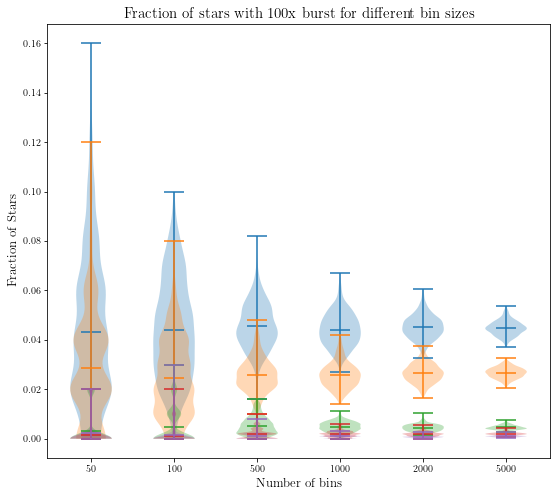

In [488]:
data_5bin_3=[cadence_frac_bursts50_5_3,cadence_frac_bursts100_5_3,cadence_frac_bursts500_5_3,\
              cadence_frac_bursts1000_5_3,cadence_frac_bursts2000_5_3,cadence_frac_bursts5000_5_3]
data_5bin_6=[cadence_frac_bursts50_5_6,cadence_frac_bursts100_5_6,cadence_frac_bursts500_5_6,\
              cadence_frac_bursts1000_5_6,cadence_frac_bursts2000_5_6,cadence_frac_bursts5000_5_6]
data_5bin_16=[cadence_frac_bursts50_5_16,cadence_frac_bursts100_5_16,cadence_frac_bursts500_5_16,\
              cadence_frac_bursts1000_5_16,cadence_frac_bursts2000_5_16,cadence_frac_bursts5000_5_16]
data_5bin_40=[cadence_frac_bursts50_5_40,cadence_frac_bursts100_5_40,cadence_frac_bursts500_5_40,\
              cadence_frac_bursts1000_5_40,cadence_frac_bursts2000_5_40,cadence_frac_bursts5000_5_40]
data_5bin_100=[cadence_frac_bursts50_5_100,cadence_frac_bursts100_5_100,cadence_frac_bursts500_5_100,\
              cadence_frac_bursts1000_5_100,cadence_frac_bursts2000_5_100,cadence_frac_bursts5000_5_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_5bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## 6 bins

In [491]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts6(full_time,size,prob2,prob3,prob6,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob2=prob2
    burst_prob3=prob3
    burst_prob6=prob6
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob2:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob2 and prob>burst_prob3:
                    burst[j,i:5+i]=np.nan
                    L[j,i:5+i]=cluster_mag[j]-0.5
                    cluster_new.append(cluster_mag[j]-0.5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob3 and prob>burst_prob6:
                    burst[j,i:7+i]=np.nan
                    L[j,i:7+i]=cluster_mag[j]-1.25
                    cluster_new.append(cluster_mag[j]-1.25)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob6 and prob>burst_prob16:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-2
                    cluster_new.append(cluster_mag[j]-2)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                    cluster_new.append(cluster_mag[j]-3)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                    cluster_new.append(cluster_mag[j]-4)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
                    cluster_new.append(cluster_mag[j]-5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total2=0
    total3=0
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total2=[]
    burst_total3=[]
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-0.5:
                total2+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
                total3+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
                total6+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total2.append(total2)
        burst_total3.append(total3)
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_frac2=[]
    frac_val2=0
    burst_frac3=[]
    frac_val3=0
    burst_frac6=[]
    frac_val6=0
    burst_frac16=[]
    frac_val16=0
    burst_frac40=[]
    frac_val40=0
    burst_frac100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-0.5:
                frac_val2+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
                frac_val3+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
                frac_val6+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_frac2.append(frac_val2)
        frac_val2=0
        burst_frac3.append(frac_val3)
        frac_val3=0
        burst_frac6.append(frac_val6)
        frac_val6=0
        burst_frac16.append(frac_val16)
        frac_val16=0
        burst_frac40.append(frac_val40)
        frac_val40=0
        burst_frac100.append(frac_val100)
        frac_val100=0  
    
    fraction2=[]
    fraction3=[]
    fraction6=[]
    fraction16=[]
    fraction40=[]
    fraction100=[]
    for i in range(len(burst_frac16)):
        fraction2.append(burst_frac2[i]/cluster_size)
        fraction3.append(burst_frac3[i]/cluster_size)
        fraction6.append(burst_frac6[i]/cluster_size)
        fraction16.append(burst_frac16[i]/cluster_size)
        fraction40.append(burst_frac40[i]/cluster_size)
        fraction100.append(burst_frac100[i]/cluster_size)
        
    return burst_total,burst_total2,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,\
burst_frac2,burst_frac3,burst_frac6,burst_frac16,burst_frac40,burst_frac100,fraction2,fraction3,fraction6,\
fraction16,fraction40,fraction100

## 50 stars

In [492]:
cluster_size50_6=50
steps=t*cadence
burst50_6=np.ones((cluster_size50_6,steps))
L50_6=np.zeros((cluster_size50_6,steps))
prob50_6_2=my_probability(1.6,5,1.6)
prob50_6_3=my_probability(3.2,5,3.2)
prob50_6_6=my_probability(6.3,5,6.3)
prob50_6_16=my_probability(16,5,16)/cadence
prob50_6_40=my_probability(40,5,40)/cadence
prob50_6_100=my_probability(100,5,100)/cadence

burst_total50_6=[]
burst_total50_6_2=[]
burst_fraction50_6_2=[]
fraction50_6_2=[]
burst_total50_6_3=[]
burst_fraction50_6_3=[]
fraction50_6_3=[]
burst_total50_6_6=[]
burst_fraction50_6_6=[]
fraction50_6_6=[]
burst_total50_6_16=[]
burst_fraction50_6_16=[]
fraction50_6_16=[]
burst_total50_6_40=[]
burst_fraction50_6_40=[]
fraction50_6_40=[]
burst_total50_6_100=[]
burst_fraction50_6_100=[]
fraction50_6_100=[]

for i in range(run):
    burst50_6=np.ones((cluster_size50_6,steps))
    L50_6=np.zeros((cluster_size50_6,steps))
    values50_6=bursts6(t,50,prob50_6_2,prob50_6_3,prob50_6_6,prob50_6_16,prob50_6_40,prob50_6_100,L50_6,burst50_6)
    burst_total50_6.append(values50_6[0])
    burst_total50_6_2.append(values50_6[1])
    burst_total50_6_3.append(values50_6[2])
    burst_total50_6_6.append(values50_6[3])
    burst_total50_6_16.append(values50_6[4])
    burst_total50_6_40.append(values50_6[5])
    burst_total50_6_100.append(values50_6[6])
    burst_fraction50_6_2.append(values50_6[7])
    burst_fraction50_6_3.append(values50_6[8])
    burst_fraction50_6_6.append(values50_6[9])
    burst_fraction50_6_16.append(values50_6[10])
    burst_fraction50_6_40.append(values50_6[11])
    burst_fraction50_6_100.append(values50_6[12])
    fraction50_6_2.append(values50_6[13])
    fraction50_6_3.append(values50_6[14])
    fraction50_6_6.append(values50_6[15])
    fraction50_6_16.append(values50_6[16])
    fraction50_6_40.append(values50_6[17])
    fraction50_6_100.append(values50_6[18])

In [493]:
cadence_frac_bursts50_6_2=[]
cadence_frac_bursts50_6_3=[]
cadence_frac_bursts50_6_6=[]
cadence_frac_bursts50_6_16=[]
cadence_frac_bursts50_6_40=[]
cadence_frac_bursts50_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts50_6_2.append(fraction50_6_2[i][j])       
        cadence_frac_bursts50_6_3.append(fraction50_6_3[i][j])
        cadence_frac_bursts50_6_6.append(fraction50_6_6[i][j])        
        cadence_frac_bursts50_6_16.append(fraction50_6_16[i][j])
        cadence_frac_bursts50_6_40.append(fraction50_6_40[i][j])
        cadence_frac_bursts50_6_100.append(fraction50_6_100[i][j])

## 100 stars

In [494]:
cluster_size100_6=100
steps=t*cadence
burst100_6=np.ones((cluster_size100_6,steps))
L100_6=np.zeros((cluster_size100_6,steps))
prob100_6_2=my_probability(1.6,5,1.6)
prob100_6_3=my_probability(3.2,5,3.2)
prob100_6_6=my_probability(6.3,5,6.3)
prob100_6_16=my_probability(16,5,16)/cadence
prob100_6_40=my_probability(40,5,40)/cadence
prob100_6_100=my_probability(100,5,100)/cadence

burst_total100_6=[]
burst_total100_6_2=[]
burst_fraction100_6_2=[]
fraction100_6_2=[]
burst_total100_6_3=[]
burst_fraction100_6_3=[]
fraction100_6_3=[]
burst_total100_6_6=[]
burst_fraction100_6_6=[]
fraction100_6_6=[]
burst_total100_6_16=[]
burst_fraction100_6_16=[]
fraction100_6_16=[]
burst_total100_6_40=[]
burst_fraction100_6_40=[]
fraction100_6_40=[]
burst_total100_6_100=[]
burst_fraction100_6_100=[]
fraction100_6_100=[]

for i in range(run):
    burst100_6=np.ones((cluster_size100_6,steps))
    L100_6=np.zeros((cluster_size100_6,steps))
    values100_6=bursts6(t,100,prob100_6_2,prob100_6_3,prob100_6_6,prob100_6_16,prob100_6_40,prob100_6_100,\
                        L100_6,burst100_6)
    burst_total100_6.append(values100_6[0])
    burst_total100_6_2.append(values100_6[1])
    burst_total100_6_3.append(values100_6[2])
    burst_total100_6_6.append(values100_6[3])
    burst_total100_6_16.append(values100_6[4])
    burst_total100_6_40.append(values100_6[5])
    burst_total100_6_100.append(values100_6[6])
    burst_fraction100_6_2.append(values100_6[7])
    burst_fraction100_6_3.append(values100_6[8])
    burst_fraction100_6_6.append(values100_6[9])
    burst_fraction100_6_16.append(values100_6[10])
    burst_fraction100_6_40.append(values100_6[11])
    burst_fraction100_6_100.append(values100_6[12])
    fraction100_6_2.append(values100_6[13])
    fraction100_6_3.append(values100_6[14])
    fraction100_6_6.append(values100_6[15])
    fraction100_6_16.append(values100_6[16])
    fraction100_6_40.append(values100_6[17])
    fraction100_6_100.append(values100_6[18])

In [495]:
cadence_frac_bursts100_6_2=[]
cadence_frac_bursts100_6_3=[]
cadence_frac_bursts100_6_6=[]
cadence_frac_bursts100_6_16=[]
cadence_frac_bursts100_6_40=[]
cadence_frac_bursts100_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts100_6_2.append(fraction100_6_2[i][j])       
        cadence_frac_bursts100_6_3.append(fraction100_6_3[i][j])
        cadence_frac_bursts100_6_6.append(fraction100_6_6[i][j])        
        cadence_frac_bursts100_6_16.append(fraction100_6_16[i][j])
        cadence_frac_bursts100_6_40.append(fraction100_6_40[i][j])
        cadence_frac_bursts100_6_100.append(fraction100_6_100[i][j])

## 500 stars

In [496]:
cluster_size500_6=500
steps=t*cadence
burst500_6=np.ones((cluster_size500_6,steps))
L500_6=np.zeros((cluster_size500_6,steps))
prob500_6_2=my_probability(1.6,5,1.6)
prob500_6_3=my_probability(3.2,5,3.2)
prob500_6_6=my_probability(6.3,5,6.3)
prob500_6_16=my_probability(16,5,16)/cadence
prob500_6_40=my_probability(40,5,40)/cadence
prob500_6_100=my_probability(100,5,100)/cadence

burst_total500_6=[]
burst_total500_6_2=[]
burst_fraction500_6_2=[]
fraction500_6_2=[]
burst_total500_6_3=[]
burst_fraction500_6_3=[]
fraction500_6_3=[]
burst_total500_6_6=[]
burst_fraction500_6_6=[]
fraction500_6_6=[]
burst_total500_6_16=[]
burst_fraction500_6_16=[]
fraction500_6_16=[]
burst_total500_6_40=[]
burst_fraction500_6_40=[]
fraction500_6_40=[]
burst_total500_6_100=[]
burst_fraction500_6_100=[]
fraction500_6_100=[]

for i in range(run):
    burst500_6=np.ones((cluster_size500_6,steps))
    L500_6=np.zeros((cluster_size500_6,steps))
    values500_6=bursts6(t,500,prob500_6_2,prob500_6_3,prob500_6_6,prob500_6_16,prob500_6_40,prob500_6_100,\
                        L500_6,burst500_6)
    burst_total500_6.append(values500_6[0])
    burst_total500_6_2.append(values500_6[1])
    burst_total500_6_3.append(values500_6[2])
    burst_total500_6_6.append(values500_6[3])
    burst_total500_6_16.append(values500_6[4])
    burst_total500_6_40.append(values500_6[5])
    burst_total500_6_100.append(values500_6[6])
    burst_fraction500_6_2.append(values500_6[7])
    burst_fraction500_6_3.append(values500_6[8])
    burst_fraction500_6_6.append(values500_6[9])
    burst_fraction500_6_16.append(values500_6[10])
    burst_fraction500_6_40.append(values500_6[11])
    burst_fraction500_6_100.append(values500_6[12])
    fraction500_6_2.append(values500_6[13])
    fraction500_6_3.append(values500_6[14])
    fraction500_6_6.append(values500_6[15])
    fraction500_6_16.append(values500_6[16])
    fraction500_6_40.append(values500_6[17])
    fraction500_6_100.append(values500_6[18])

In [497]:
cadence_frac_bursts500_6_2=[]
cadence_frac_bursts500_6_3=[]
cadence_frac_bursts500_6_6=[]
cadence_frac_bursts500_6_16=[]
cadence_frac_bursts500_6_40=[]
cadence_frac_bursts500_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts500_6_2.append(fraction500_6_2[i][j])       
        cadence_frac_bursts500_6_3.append(fraction500_6_3[i][j])
        cadence_frac_bursts500_6_6.append(fraction500_6_6[i][j])        
        cadence_frac_bursts500_6_16.append(fraction500_6_16[i][j])
        cadence_frac_bursts500_6_40.append(fraction500_6_40[i][j])
        cadence_frac_bursts500_6_100.append(fraction500_6_100[i][j])

## 1000 stars

In [498]:
cluster_size1000_6=1000
steps=t*cadence
burst1000_6=np.ones((cluster_size1000_6,steps))
L1000_6=np.zeros((cluster_size1000_6,steps))
prob1000_6_2=my_probability(1.6,5,1.6)
prob1000_6_3=my_probability(3.2,5,3.2)
prob1000_6_6=my_probability(6.3,5,6.3)
prob1000_6_16=my_probability(16,5,16)/cadence
prob1000_6_40=my_probability(40,5,40)/cadence
prob1000_6_100=my_probability(100,5,100)/cadence

burst_total1000_6=[]
burst_total1000_6_2=[]
burst_fraction1000_6_2=[]
fraction1000_6_2=[]
burst_total1000_6_3=[]
burst_fraction1000_6_3=[]
fraction1000_6_3=[]
burst_total1000_6_6=[]
burst_fraction1000_6_6=[]
fraction1000_6_6=[]
burst_total1000_6_16=[]
burst_fraction1000_6_16=[]
fraction1000_6_16=[]
burst_total1000_6_40=[]
burst_fraction1000_6_40=[]
fraction1000_6_40=[]
burst_total1000_6_100=[]
burst_fraction1000_6_100=[]
fraction1000_6_100=[]

for i in range(run):
    burst1000_6=np.ones((cluster_size1000_6,steps))
    L1000_6=np.zeros((cluster_size1000_6,steps))
    values1000_6=bursts6(t,1000,prob1000_6_2,prob1000_6_3,prob1000_6_6,prob1000_6_16,prob1000_6_40,prob1000_6_100,\
                        L1000_6,burst1000_6)
    burst_total1000_6.append(values1000_6[0])
    burst_total1000_6_2.append(values1000_6[1])
    burst_total1000_6_3.append(values1000_6[2])
    burst_total1000_6_6.append(values1000_6[3])
    burst_total1000_6_16.append(values1000_6[4])
    burst_total1000_6_40.append(values1000_6[5])
    burst_total1000_6_100.append(values1000_6[6])
    burst_fraction1000_6_2.append(values1000_6[7])
    burst_fraction1000_6_3.append(values1000_6[8])
    burst_fraction1000_6_6.append(values1000_6[9])
    burst_fraction1000_6_16.append(values1000_6[10])
    burst_fraction1000_6_40.append(values1000_6[11])
    burst_fraction1000_6_100.append(values1000_6[12])
    fraction1000_6_2.append(values1000_6[13])
    fraction1000_6_3.append(values1000_6[14])
    fraction1000_6_6.append(values1000_6[15])
    fraction1000_6_16.append(values1000_6[16])
    fraction1000_6_40.append(values1000_6[17])
    fraction1000_6_100.append(values1000_6[18])

In [499]:
cadence_frac_bursts1000_6_2=[]
cadence_frac_bursts1000_6_3=[]
cadence_frac_bursts1000_6_6=[]
cadence_frac_bursts1000_6_16=[]
cadence_frac_bursts1000_6_40=[]
cadence_frac_bursts1000_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts1000_6_2.append(fraction1000_6_2[i][j])       
        cadence_frac_bursts1000_6_3.append(fraction1000_6_3[i][j])
        cadence_frac_bursts1000_6_6.append(fraction1000_6_6[i][j])        
        cadence_frac_bursts1000_6_16.append(fraction1000_6_16[i][j])
        cadence_frac_bursts1000_6_40.append(fraction1000_6_40[i][j])
        cadence_frac_bursts1000_6_100.append(fraction1000_6_100[i][j])

## 2000 stars

In [500]:
cluster_size2000_6=2000
steps=t*cadence
burst2000_6=np.ones((cluster_size2000_6,steps))
L2000_6=np.zeros((cluster_size2000_6,steps))
prob2000_6_2=my_probability(1.6,5,1.6)
prob2000_6_3=my_probability(3.2,5,3.2)
prob2000_6_6=my_probability(6.3,5,6.3)
prob2000_6_16=my_probability(16,5,16)/cadence
prob2000_6_40=my_probability(40,5,40)/cadence
prob2000_6_100=my_probability(100,5,100)/cadence

burst_total2000_6=[]
burst_total2000_6_2=[]
burst_fraction2000_6_2=[]
fraction2000_6_2=[]
burst_total2000_6_3=[]
burst_fraction2000_6_3=[]
fraction2000_6_3=[]
burst_total2000_6_6=[]
burst_fraction2000_6_6=[]
fraction2000_6_6=[]
burst_total2000_6_16=[]
burst_fraction2000_6_16=[]
fraction2000_6_16=[]
burst_total2000_6_40=[]
burst_fraction2000_6_40=[]
fraction2000_6_40=[]
burst_total2000_6_100=[]
burst_fraction2000_6_100=[]
fraction2000_6_100=[]

for i in range(run):
    burst2000_6=np.ones((cluster_size2000_6,steps))
    L2000_6=np.zeros((cluster_size2000_6,steps))
    values2000_6=bursts6(t,2000,prob2000_6_2,prob2000_6_3,prob2000_6_6,prob2000_6_16,prob2000_6_40,prob2000_6_100,\
                        L2000_6,burst2000_6)
    burst_total2000_6.append(values2000_6[0])
    burst_total2000_6_2.append(values2000_6[1])
    burst_total2000_6_3.append(values2000_6[2])
    burst_total2000_6_6.append(values2000_6[3])
    burst_total2000_6_16.append(values2000_6[4])
    burst_total2000_6_40.append(values2000_6[5])
    burst_total2000_6_100.append(values2000_6[6])
    burst_fraction2000_6_2.append(values2000_6[7])
    burst_fraction2000_6_3.append(values2000_6[8])
    burst_fraction2000_6_6.append(values2000_6[9])
    burst_fraction2000_6_16.append(values2000_6[10])
    burst_fraction2000_6_40.append(values2000_6[11])
    burst_fraction2000_6_100.append(values2000_6[12])
    fraction2000_6_2.append(values2000_6[13])
    fraction2000_6_3.append(values2000_6[14])
    fraction2000_6_6.append(values2000_6[15])
    fraction2000_6_16.append(values2000_6[16])
    fraction2000_6_40.append(values2000_6[17])
    fraction2000_6_100.append(values2000_6[18])

In [501]:
cadence_frac_bursts2000_6_2=[]
cadence_frac_bursts2000_6_3=[]
cadence_frac_bursts2000_6_6=[]
cadence_frac_bursts2000_6_16=[]
cadence_frac_bursts2000_6_40=[]
cadence_frac_bursts2000_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts2000_6_2.append(fraction2000_6_2[i][j])       
        cadence_frac_bursts2000_6_3.append(fraction2000_6_3[i][j])
        cadence_frac_bursts2000_6_6.append(fraction2000_6_6[i][j])        
        cadence_frac_bursts2000_6_16.append(fraction2000_6_16[i][j])
        cadence_frac_bursts2000_6_40.append(fraction2000_6_40[i][j])
        cadence_frac_bursts2000_6_100.append(fraction2000_6_100[i][j])

## 5000 stars

In [502]:
cluster_size5000_6=5000
steps=t*cadence
burst5000_6=np.ones((cluster_size5000_6,steps))
L5000_6=np.zeros((cluster_size5000_6,steps))
prob5000_6_2=my_probability(1.6,5,1.6)
prob5000_6_3=my_probability(3.2,5,3.2)
prob5000_6_6=my_probability(6.3,5,6.3)
prob5000_6_16=my_probability(16,5,16)/cadence
prob5000_6_40=my_probability(40,5,40)/cadence
prob5000_6_100=my_probability(100,5,100)/cadence

burst_total5000_6=[]
burst_total5000_6_2=[]
burst_fraction5000_6_2=[]
fraction5000_6_2=[]
burst_total5000_6_3=[]
burst_fraction5000_6_3=[]
fraction5000_6_3=[]
burst_total5000_6_6=[]
burst_fraction5000_6_6=[]
fraction5000_6_6=[]
burst_total5000_6_16=[]
burst_fraction5000_6_16=[]
fraction5000_6_16=[]
burst_total5000_6_40=[]
burst_fraction5000_6_40=[]
fraction5000_6_40=[]
burst_total5000_6_100=[]
burst_fraction5000_6_100=[]
fraction5000_6_100=[]

for i in range(run):
    print(i)
    burst5000_6=np.ones((cluster_size5000_6,steps))
    L5000_6=np.zeros((cluster_size5000_6,steps))
    values5000_6=bursts6(t,5000,prob5000_6_2,prob5000_6_3,prob5000_6_6,prob5000_6_16,prob5000_6_40,prob5000_6_100,\
                        L5000_6,burst5000_6)
    burst_total5000_6.append(values5000_6[0])
    burst_total5000_6_2.append(values5000_6[1])
    burst_total5000_6_3.append(values5000_6[2])
    burst_total5000_6_6.append(values5000_6[3])
    burst_total5000_6_16.append(values5000_6[4])
    burst_total5000_6_40.append(values5000_6[5])
    burst_total5000_6_100.append(values5000_6[6])
    burst_fraction5000_6_2.append(values5000_6[7])
    burst_fraction5000_6_3.append(values5000_6[8])
    burst_fraction5000_6_6.append(values5000_6[9])
    burst_fraction5000_6_16.append(values5000_6[10])
    burst_fraction5000_6_40.append(values5000_6[11])
    burst_fraction5000_6_100.append(values5000_6[12])
    fraction5000_6_2.append(values5000_6[13])
    fraction5000_6_3.append(values5000_6[14])
    fraction5000_6_6.append(values5000_6[15])
    fraction5000_6_16.append(values5000_6[16])
    fraction5000_6_40.append(values5000_6[17])
    fraction5000_6_100.append(values5000_6[18])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [503]:
cadence_frac_bursts5000_6_2=[]
cadence_frac_bursts5000_6_3=[]
cadence_frac_bursts5000_6_6=[]
cadence_frac_bursts5000_6_16=[]
cadence_frac_bursts5000_6_40=[]
cadence_frac_bursts5000_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_frac_bursts5000_6_2.append(fraction5000_6_2[i][j])       
        cadence_frac_bursts5000_6_3.append(fraction5000_6_3[i][j])
        cadence_frac_bursts5000_6_6.append(fraction5000_6_6[i][j])        
        cadence_frac_bursts5000_6_16.append(fraction5000_6_16[i][j])
        cadence_frac_bursts5000_6_40.append(fraction5000_6_40[i][j])
        cadence_frac_bursts5000_6_100.append(fraction5000_6_100[i][j])

[]

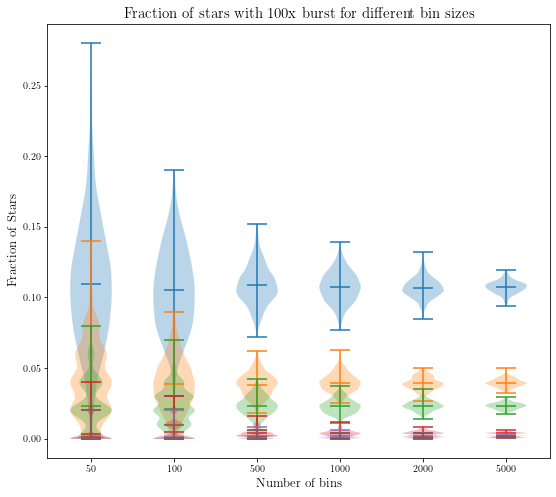

In [504]:
data_6bin_2=[cadence_frac_bursts50_6_2,cadence_frac_bursts100_6_2,cadence_frac_bursts500_6_2,\
            cadence_frac_bursts1000_6_2,cadence_frac_bursts2000_6_2,cadence_frac_bursts5000_6_2]
data_6bin_3=[cadence_frac_bursts50_6_3,cadence_frac_bursts100_6_3,cadence_frac_bursts500_6_3,\
              cadence_frac_bursts1000_6_3,cadence_frac_bursts2000_6_3,cadence_frac_bursts5000_6_3]
data_6bin_6=[cadence_frac_bursts50_6_6,cadence_frac_bursts100_6_6,cadence_frac_bursts500_6_6,\
              cadence_frac_bursts1000_6_6,cadence_frac_bursts2000_6_6,cadence_frac_bursts5000_6_6]
data_6bin_16=[cadence_frac_bursts50_6_16,cadence_frac_bursts100_6_16,cadence_frac_bursts500_6_16,\
              cadence_frac_bursts1000_6_16,cadence_frac_bursts2000_6_16,cadence_frac_bursts5000_6_16]
data_6bin_40=[cadence_frac_bursts50_6_40,cadence_frac_bursts100_6_40,cadence_frac_bursts500_6_40,\
              cadence_frac_bursts1000_6_40,cadence_frac_bursts2000_6_40,cadence_frac_bursts5000_6_40]
data_6bin_100=[cadence_frac_bursts50_6_100,cadence_frac_bursts100_6_100,cadence_frac_bursts500_6_100,\
              cadence_frac_bursts1000_6_100,cadence_frac_bursts2000_6_100,cadence_frac_bursts5000_6_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_6bin_2,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## panel plot

<ipython-input-505-7c8d9094ab73>:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
<ipython-input-505-7c8d9094ab73>:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])


[]

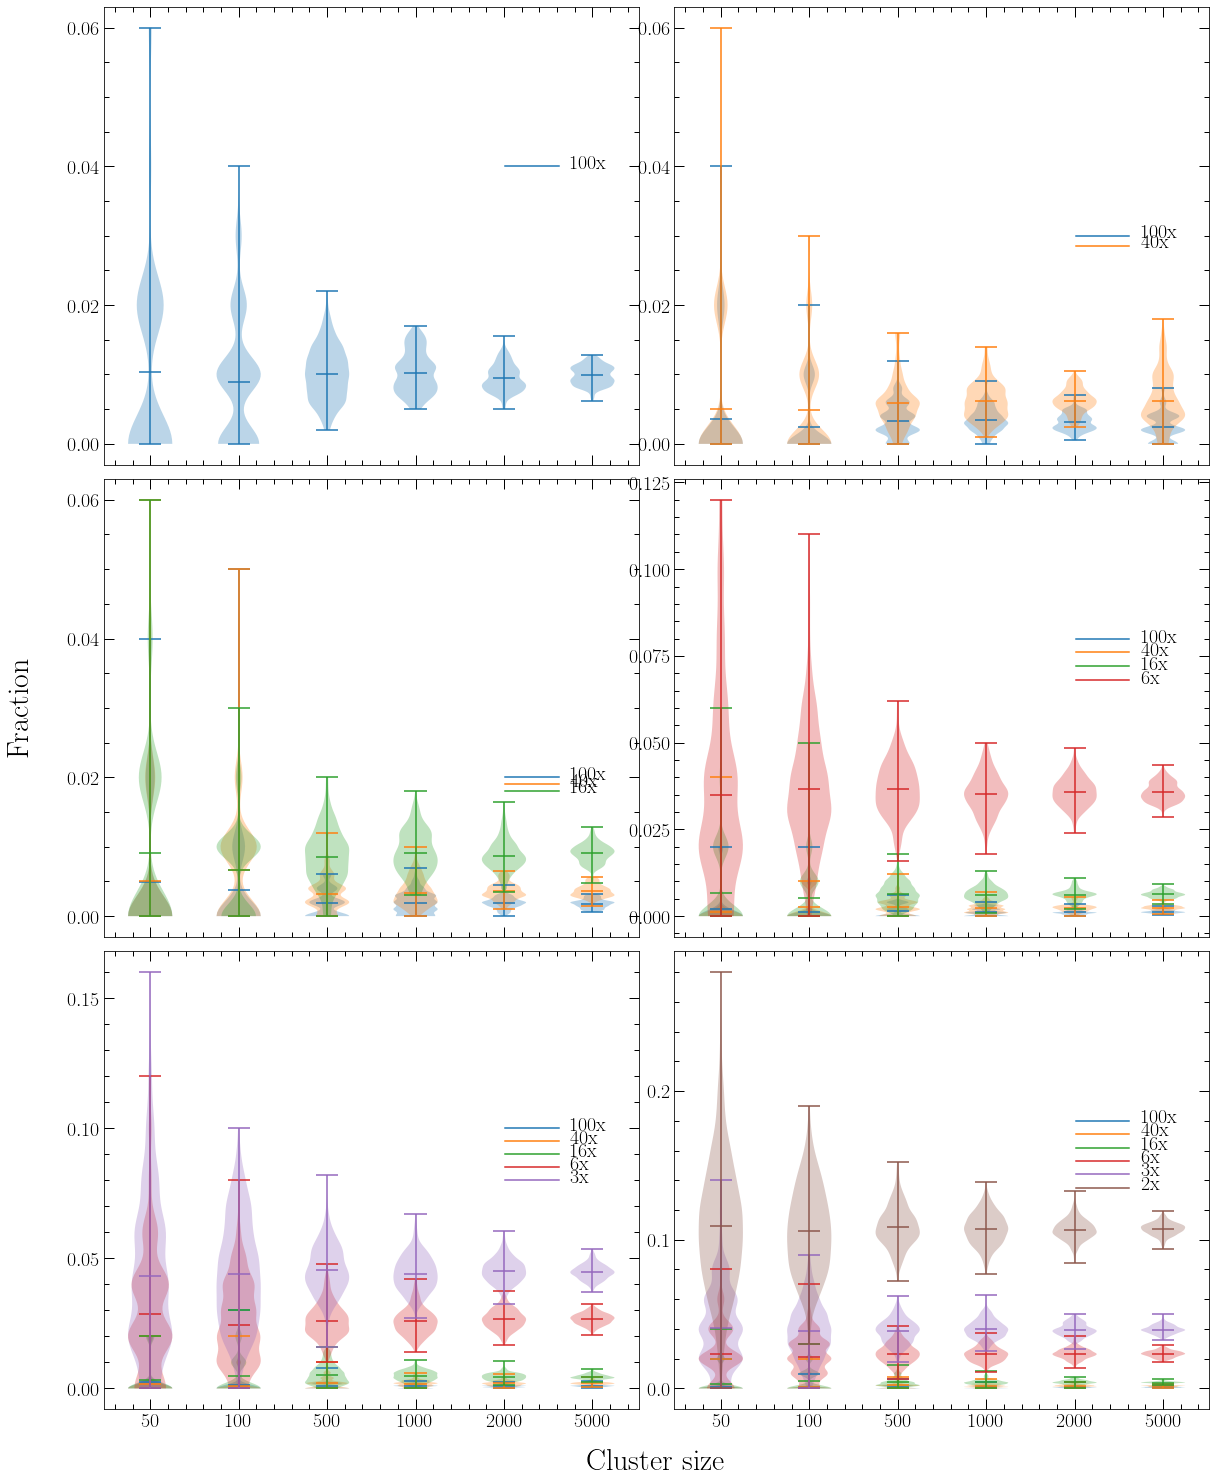

In [505]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,sharex='col')
fig.set_size_inches(16,20)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#ax1
ax1.violinplot(data_1bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax2
ax2.violinplot(data_2bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_2bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax3
ax3.violinplot(data_3bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax3.violinplot(data_3bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax3.violinplot(data_3bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax4
ax4.violinplot(data_4bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax5
ax5.violinplot(data_5bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax6.violinplot(data_6bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_2,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

fig.tight_layout()

#tick mark time
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax3.minorticks_on()
ax3.locator_params(axis='y',nbins=6)
ax3.tick_params(axis='both',right=True,top=True,which='both')
ax3.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax3.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax4.minorticks_on()
ax4.locator_params(axis='y',nbins=6)
ax4.tick_params(axis='both',right=True,top=True,which='both')
ax4.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax4.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax5.minorticks_on()
ax5.locator_params(axis='y',nbins=6)
ax5.tick_params(axis='both',right=True,top=True,which='both')
ax5.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax5.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax6.minorticks_on()
ax6.locator_params(axis='y',nbins=6)
ax6.tick_params(axis='both',right=True,top=True,which='both')
ax6.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax6.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)

#labels
ax1.axhline(0.04, xmin=0.75, xmax=0.85,color='#1f77b4')
ax1.text(5.75,0.03975,'100x',fontsize=20)

ax2.axhline(0.03, xmin=0.75, xmax=0.85,color='#1f77b4')
ax2.text(5.75,0.02975,'100x',fontsize=20)
ax2.axhline(0.0285,xmin=0.75,xmax=0.85,color='#ff7f0e')
ax2.text(5.75,0.02825,'40x',fontsize=20)

ax3.axhline(0.02, xmin=0.75, xmax=0.85,color='#1f77b4')
ax3.text(5.75,0.01975,'100x',fontsize=20)
ax3.axhline(0.019,xmin=0.75,xmax=0.85,color='#ff7f0e')
ax3.text(5.75,0.01875,'40x',fontsize=20)
ax3.axhline(0.018,xmin=0.75,xmax=0.85,color='#2ca02c')
ax3.text(5.75,0.01775,'16x',fontsize=20)

ax4.axhline(0.08, xmin=0.75, xmax=0.85,color='#1f77b4')
ax4.text(5.75,0.079,'100x',fontsize=20)
ax4.axhline(0.076,xmin=0.75,xmax=0.85,color='#ff7f0e')
ax4.text(5.75,0.075,'40x',fontsize=20)
ax4.axhline(0.072,xmin=0.75,xmax=0.85,color='#2ca02c')
ax4.text(5.75,0.071,'16x',fontsize=20)
ax4.axhline(0.068,xmin=0.75,xmax=0.85,color='#d62728')
ax4.text(5.75,0.067,'6x',fontsize=20)

ax5.axhline(0.1, xmin=0.75, xmax=0.85,color='#1f77b4')
ax5.text(5.75,0.099,'100x',fontsize=20)
ax5.axhline(0.095,xmin=0.75,xmax=0.85,color='#ff7f0e')
ax5.text(5.75,0.094,'40x',fontsize=20)
ax5.axhline(0.09,xmin=0.75,xmax=0.85,color='#2ca02c')
ax5.text(5.75,0.089,'16x',fontsize=20)
ax5.axhline(0.085,xmin=0.75,xmax=0.85,color='#d62728')
ax5.text(5.75,0.084,'6x',fontsize=20)
ax5.axhline(0.08,xmin=0.75,xmax=0.85,color='#9467bd')
ax5.text(5.75,0.079,'3x',fontsize=20)

ax6.axhline(0.18, xmin=0.75, xmax=0.85,color='#1f77b4')
ax6.text(5.75,0.179,'100x',fontsize=20)
ax6.axhline(0.171,xmin=0.75,xmax=0.85,color='#ff7f0e')
ax6.text(5.75,0.17,'40x',fontsize=20)
ax6.axhline(0.162,xmin=0.75,xmax=0.85,color='#2ca02c')
ax6.text(5.75,0.161,'16x',fontsize=20)
ax6.axhline(0.153,xmin=0.75,xmax=0.85,color='#d62728')
ax6.text(5.75,0.152,'6x',fontsize=20)
ax6.axhline(0.144,xmin=0.75,xmax=0.85,color='#9467bd')
ax6.text(5.75,0.143,'3x',fontsize=20)
ax6.axhline(0.135,xmin=0.75,xmax=0.85,color='#8c564b')
ax6.text(5.75,0.134,'2x',fontsize=20)



#'#2ca02c'=green
#'#d62728'=red
#'#9467bd'=purple
#'#8c564b'=brown


ax7=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax7.set_yticks([])
ax7.set_xticks([])
ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax7.set_ylabel(r'Fraction',fontsize=30,labelpad=70)
ax7.set_xlabel('Cluster size',fontsize=30,labelpad=40)

plt.plot()

## add in ghost points

In [506]:
mean_frac50_1=np.mean(cadence_frac_bursts50_1)

mean_frac50_2_100=np.mean(cadence_frac_bursts50_2_100)
mean_frac50_2_40=np.mean(cadence_frac_bursts50_2_40)

mean_frac50_3_100=np.mean(cadence_frac_bursts50_3_100)
mean_frac50_3_40=np.mean(cadence_frac_bursts50_3_40)
mean_frac50_3_16=np.mean(cadence_frac_bursts50_3_16)

mean_frac50_4_100=np.mean(cadence_frac_bursts50_4_100)
mean_frac50_4_40=np.mean(cadence_frac_bursts50_4_40)
mean_frac50_4_16=np.mean(cadence_frac_bursts50_4_16)
mean_frac50_4_6=np.mean(cadence_frac_bursts50_4_6)

mean_frac50_5_100=np.mean(cadence_frac_bursts50_5_100)
mean_frac50_5_40=np.mean(cadence_frac_bursts50_5_40)
mean_frac50_5_16=np.mean(cadence_frac_bursts50_5_16)
mean_frac50_5_6=np.mean(cadence_frac_bursts50_5_6)
mean_frac50_5_3=np.mean(cadence_frac_bursts50_5_3)

mean_frac50_6_100=np.mean(cadence_frac_bursts50_6_100)
mean_frac50_6_40=np.mean(cadence_frac_bursts50_6_40)
mean_frac50_6_16=np.mean(cadence_frac_bursts50_6_16)
mean_frac50_6_6=np.mean(cadence_frac_bursts50_6_6)
mean_frac50_6_3=np.mean(cadence_frac_bursts50_6_3)
mean_frac50_6_2=np.mean(cadence_frac_bursts50_6_2)

In [587]:
mean_frac100_1=np.mean(cadence_frac_bursts100_1)
mean_frac500_1=np.mean(cadence_frac_bursts500_1)
mean_frac1000_1=np.mean(cadence_frac_bursts1000_1)
mean_frac2000_1=np.mean(cadence_frac_bursts2000_1)
mean_frac5000_1=np.mean(cadence_frac_bursts5000_1)

<ipython-input-616-04167f60bb83>:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
<ipython-input-616-04167f60bb83>:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])


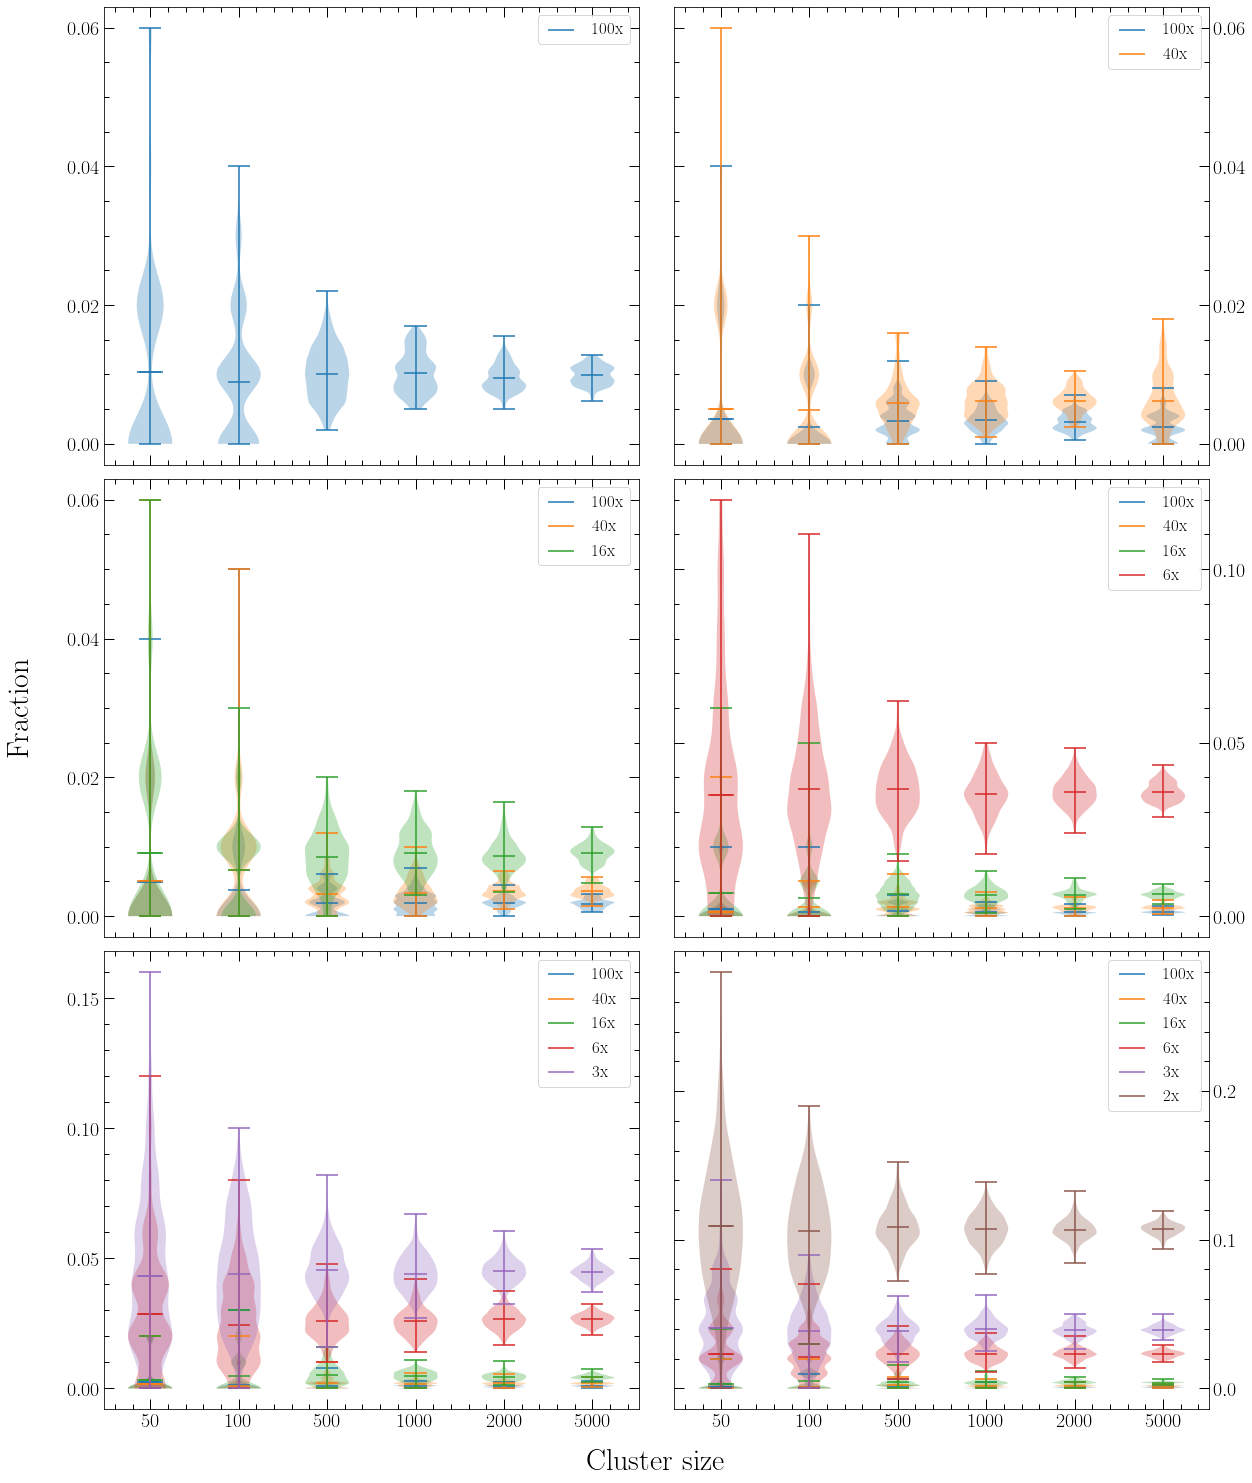

In [616]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,sharex='col')
fig.set_size_inches(16,20)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#ax1
ax1.violinplot(data_1bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax2
ax2.violinplot(data_2bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_2bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)


#ax3
ax3.violinplot(data_3bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax3.violinplot(data_3bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax3.violinplot(data_3bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax4
ax4.violinplot(data_4bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax5
ax5.violinplot(data_5bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax6.violinplot(data_6bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_2,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

fig.tight_layout()

#tick mark time
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax3.minorticks_on()
ax3.locator_params(axis='y',nbins=6)
ax3.tick_params(axis='both',right=True,top=True,which='both')
ax3.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax3.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax4.minorticks_on()
ax4.locator_params(axis='y',nbins=4)
ax4.yaxis.tick_right()
ax4.yaxis.set_ticks_position('both')
ax4.tick_params(axis='both',right=True,top=True,which='both')
ax4.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax4.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax5.minorticks_on()
ax5.locator_params(axis='y',nbins=6)
ax5.tick_params(axis='both',right=True,top=True,which='both')
ax5.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax5.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax6.minorticks_on()
ax6.locator_params(axis='y',nbins=6)
ax6.yaxis.tick_right()
ax6.yaxis.set_ticks_position('both')
ax6.tick_params(axis='both',right=True,top=True,which='both')
ax6.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax6.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)

#labels
ax1.scatter(1,mean_frac50_1,marker='_',s=700,color='#1f77b4',label='100x')

ax2.scatter(1,mean_frac50_2_100,marker='_',s=700,color='#1f77b4',label='100x')
ax2.scatter(1,mean_frac50_2_40,marker='_',s=700,color='#ff7f0e',label='40x')

ax3.scatter(1,mean_frac50_3_100,marker='_',s=700,color='#1f77b4',label='100x')
ax3.scatter(1,mean_frac50_3_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax3.scatter(1,mean_frac50_3_16,marker='_',s=700,color='#2ca02c',label='16x')

ax4.scatter(1,mean_frac50_4_100,marker='_',s=700,color='#1f77b4',label='100x')
ax4.scatter(1,mean_frac50_4_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax4.scatter(1,mean_frac50_4_16,marker='_',s=700,color='#2ca02c',label='16x')
ax4.scatter(1,mean_frac50_4_6,marker='_',s=700,color='#d62728',label='6x')

ax5.scatter(1,mean_frac50_5_100,marker='_',s=700,color='#1f77b4',label='100x')
ax5.scatter(1,mean_frac50_5_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax5.scatter(1,mean_frac50_5_16,marker='_',s=700,color='#2ca02c',label='16x')
ax5.scatter(1,mean_frac50_5_6,marker='_',s=700,color='#d62728',label='6x')
ax5.scatter(1,mean_frac50_5_3,marker='_',s=700,color='#9467bd',label='3x')

ax6.scatter(1,mean_frac50_6_100,marker='_',s=700,color='#1f77b4',label='100x')
ax6.scatter(1,mean_frac50_6_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax6.scatter(1,mean_frac50_6_16,marker='_',s=700,color='#2ca02c',label='16x')
ax6.scatter(1,mean_frac50_6_6,marker='_',s=700,color='#d62728',label='6x')
ax6.scatter(1,mean_frac50_6_3,marker='_',s=700,color='#9467bd',label='3x')
ax6.scatter(1,mean_frac50_6_2,marker='_',s=700,color='#8c564b',label='2x')



ax7=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax7.set_yticks([])
ax7.set_xticks([])
ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax7.set_ylabel(r'Fraction',fontsize=30,labelpad=70)
ax7.set_xlabel('Cluster size',fontsize=30,labelpad=40)

ax1.legend(fontsize=17)
ax2.legend(fontsize=17)
ax3.legend(fontsize=17)
ax4.legend(fontsize=17)
ax5.legend(fontsize=17)
ax6.legend(fontsize=17)

#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax5.set_yscale('log')
#ax6.set_yscale('log')
plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/multipanel/Comp_Bin_Size_BurstFrac_All.jpeg',dpi=300,bbox_inches='tight')

In [581]:
data50=[cadence_frac_bursts50_1,cadence_frac_bursts50_2_100,cadence_frac_bursts50_3_100,\
            cadence_frac_bursts50_4_100,cadence_frac_bursts50_5_100,cadence_frac_bursts50_6_100]
data100=[cadence_frac_bursts100_1,cadence_frac_bursts100_2_100,cadence_frac_bursts100_3_100,\
            cadence_frac_bursts100_4_100,cadence_frac_bursts100_5_100,cadence_frac_bursts100_6_100]
data500=[cadence_frac_bursts500_1,cadence_frac_bursts500_2_100,cadence_frac_bursts500_3_100,\
            cadence_frac_bursts500_4_100,cadence_frac_bursts500_5_100,cadence_frac_bursts500_6_100]
data1000=[cadence_frac_bursts1000_1,cadence_frac_bursts1000_2_100,cadence_frac_bursts1000_3_100,\
            cadence_frac_bursts1000_4_100,cadence_frac_bursts1000_5_100,cadence_frac_bursts1000_6_100]
data2000=[cadence_frac_bursts2000_1,cadence_frac_bursts2000_2_100,cadence_frac_bursts2000_3_100,\
            cadence_frac_bursts2000_4_100,cadence_frac_bursts2000_5_100,cadence_frac_bursts2000_6_100]
data5000=[cadence_frac_bursts5000_1,cadence_frac_bursts5000_2_100,cadence_frac_bursts5000_3_100,\
            cadence_frac_bursts5000_4_100,cadence_frac_bursts5000_5_100,cadence_frac_bursts5000_6_100]

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,sharex='col')
fig.set_size_inches(16,20)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#colors
#blue=#1f77b4
#orange=#ff7f0e
#green=#2ca02c
#red=#d62728
#purple=#9467bd
#brown=#8c564b

#ax1
v1=ax1.violinplot(data50,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v1['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v1[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

#ax2
v2=ax2.violinplot(data100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v2['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v2[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

#ax3
v3=ax3.violinplot(data500,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v3['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)

#ax4
v4=ax4.violinplot(data1000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v4['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v4[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

#ax5
v5=ax5.violinplot(data2000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v5['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v5[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)

#ax6
v6=ax6.violinplot(data5000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v6['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2)

fig.tight_layout()

#tick mark time
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax3.minorticks_on()
ax3.locator_params(axis='y',nbins=6)
ax3.tick_params(axis='both',right=True,top=True,which='both')
ax3.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax3.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax4.minorticks_on()
ax4.locator_params(axis='y',nbins=6)
ax4.yaxis.tick_right()
ax4.yaxis.set_ticks_position('both')
ax4.tick_params(axis='both',right=True,top=True,which='both')
ax4.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax4.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax5.minorticks_on()
ax5.locator_params(axis='y',nbins=6)
ax5.tick_params(axis='both',right=True,top=True,which='both')
ax5.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax5.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax6.minorticks_on()
ax6.locator_params(axis='y',nbins=6)
ax6.yaxis.tick_right()
ax6.yaxis.set_ticks_position('both')
ax6.tick_params(axis='both',right=True,top=True,which='both')
ax6.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax6.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)

#labels
ax1.scatter(1,mean_frac50_1,marker='_',s=1000,color='#1f77b4',label='50 stars')

ax2.scatter(1,mean_frac100_1,marker='_',s=1000,color='#ff7f0e',label='100 stars')

ax3.scatter(1,mean_frac500_1,marker='_',s=1000,color='#2ca02c',label='500 stars')

ax4.scatter(1,mean_frac1000_1,marker='_',s=1000,color='#d62728',label='1000 stars')

ax5.scatter(1,mean_frac2000_1,marker='_',s=1000,color='#9467bd',label='2000 stars')

ax6.scatter(1,mean_frac5000_1,marker='_',s=1000,color='#8c564b',label='5000 stars')


#mark 1%
ax1.axhline(0.01,color='red',ls=(0,(5,5)))
ax2.axhline(0.01,color='red',ls=(0,(5,5)))
ax3.axhline(0.01,color='red',ls=(0,(5,5)))
ax4.axhline(0.01,color='red',ls=(0,(5,5)))
ax5.axhline(0.01,color='red',ls=(0,(5,5)))
ax6.axhline(0.01,color='red',ls=(0,(5,5)))

ax7=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax7.set_yticks([])
ax7.set_xticks([])
#ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
#ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax7.set_ylabel(r'Fraction of stars undergoing a burst',fontsize=30,labelpad=70)
ax7.set_xlabel('Number of burst types allowed',fontsize=30,labelpad=40)
ax7.set_title('Fraction of stars undergoing a burst with respect to bin and cluster size',fontsize=35)

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)
ax4.legend(fontsize=20)
ax5.legend(fontsize=20)
ax6.legend(fontsize=20)

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/multipanel/Comp_bin_frac_all.jpeg',dpi=300,bbox_inches='tight')